In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import tempfile
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import sklearn
import tensorflow as tf
!pip install graphviz
import graphviz
!pip install keras-tuner
import keras_tuner as kt
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc as sklearn_auc
from sklearn.calibration import calibration_curve
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from tensorflow import keras
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras import layers, models, optimizers, losses
from IPython.display import Image




## **Figure 33. Example of Data Flowing Through a Multi-Layer Neural Network (Input → Hidden Layers → Output)**

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Layer (Dense)             │ (None, 32)             │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_1 (Dense)          │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_2 (Dense)          │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,577 (17.88 KB)

 Trainable params: 4,577 (17.88 KB)

 Non-trainable params: 0 (0.00 B)

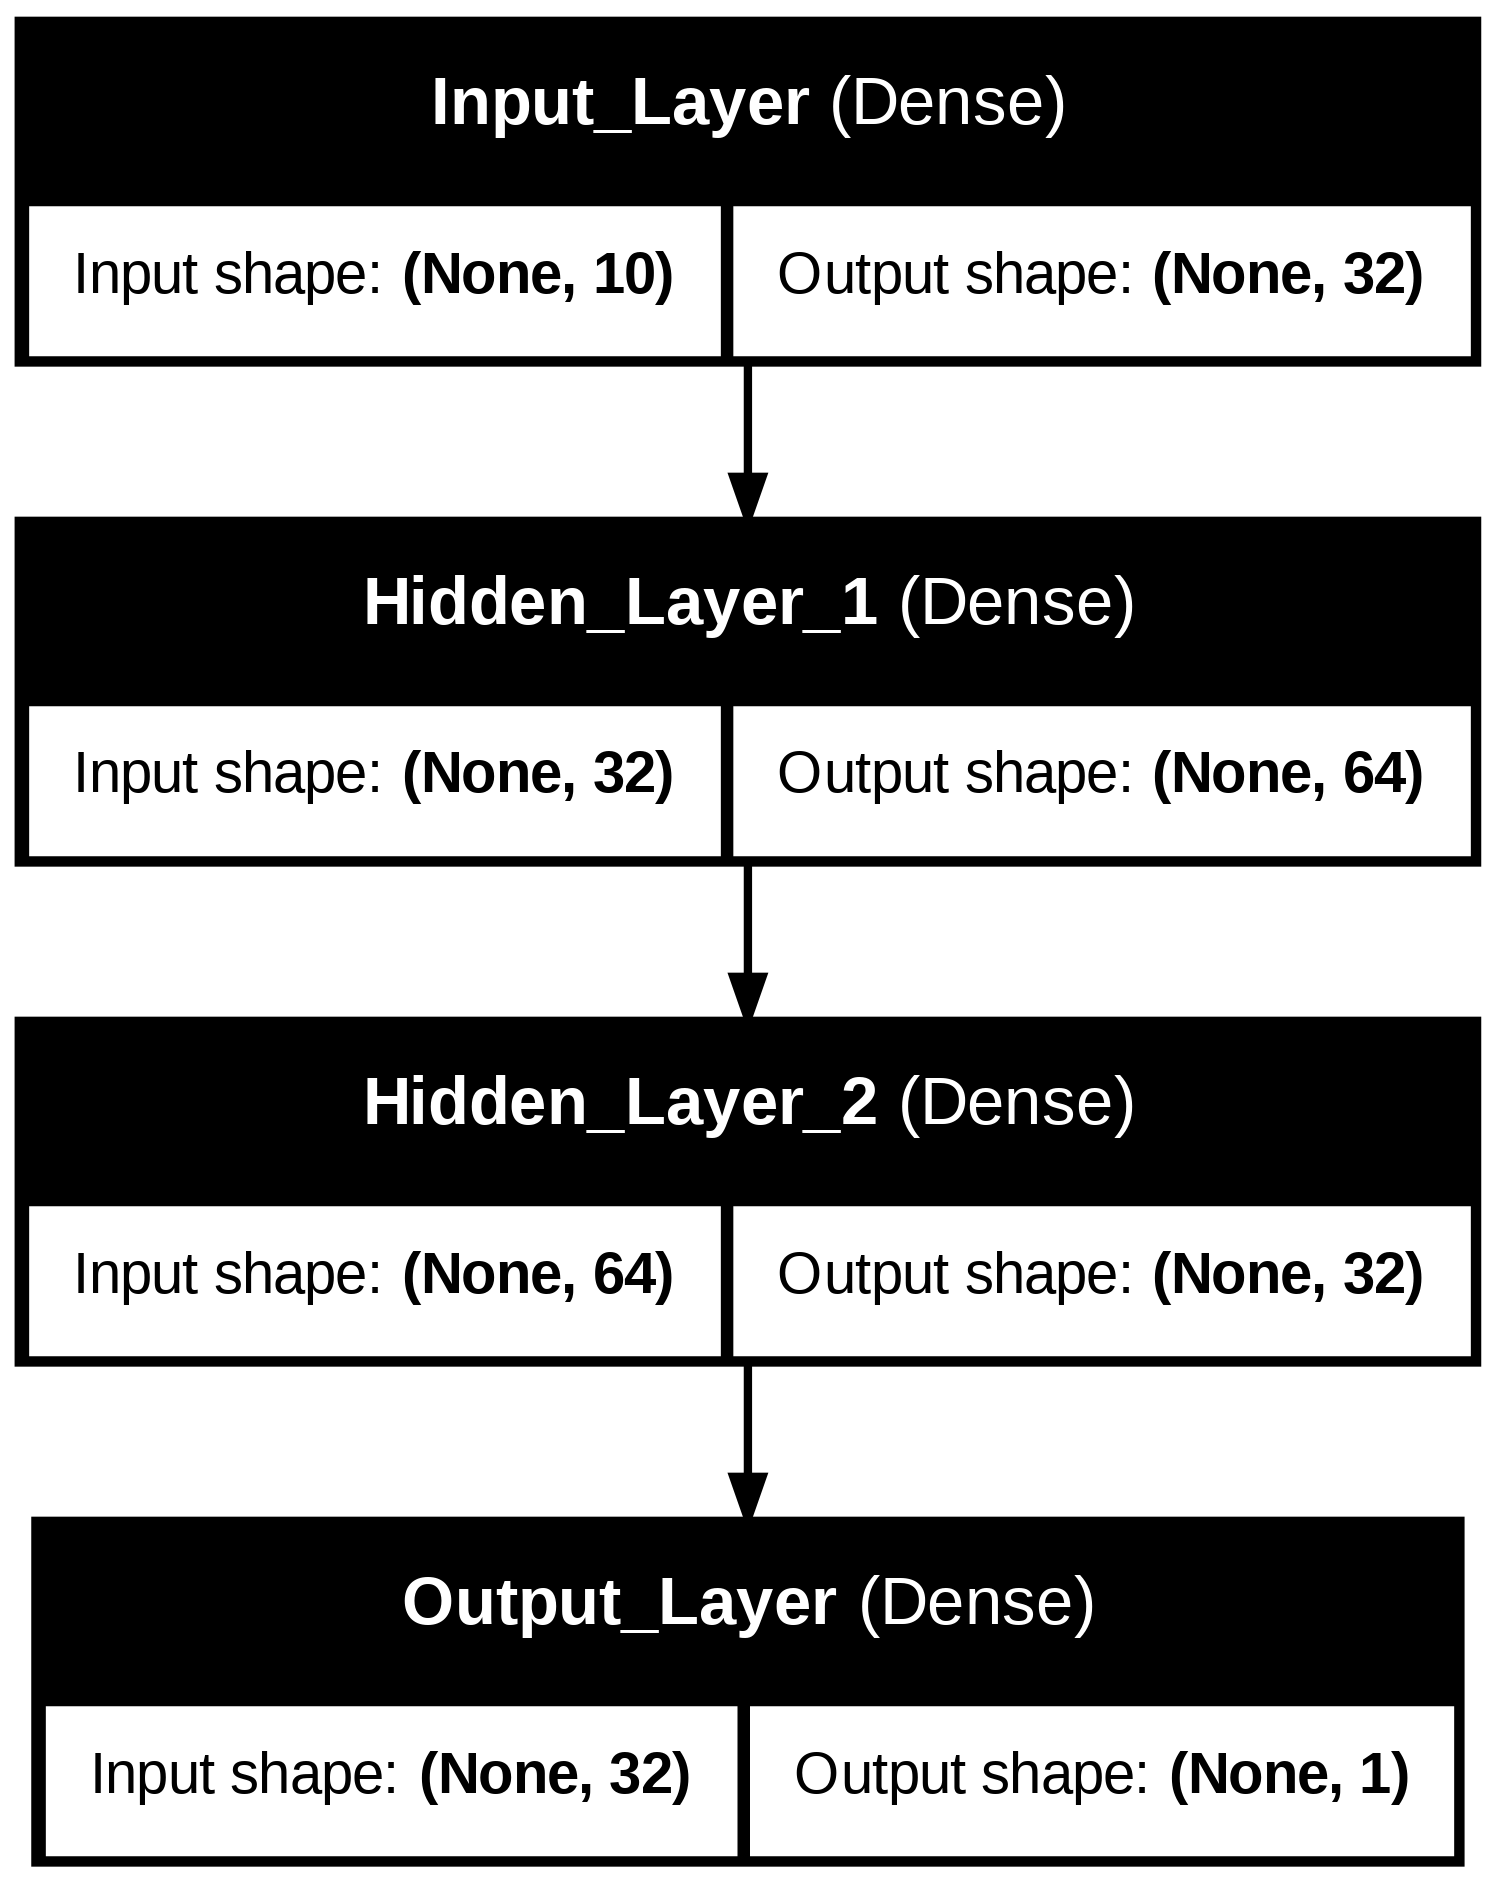

In [2]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,), name="Input_Layer"),
    Dense(64, activation='relu', name="Hidden_Layer_1"),
    Dense(32, activation='relu', name="Hidden_Layer_2"),
    Dense(1, activation='sigmoid', name="Output_Layer")])

model.summary()

plot_model(
    model,
    to_file="neural_network.png",
    show_shapes=True,
    show_layer_names=True,
    dpi=300)

## **Figure 34. A simple diagram of a Fully Connected Layer (Input Vector → Weights → Bias → Activation)**

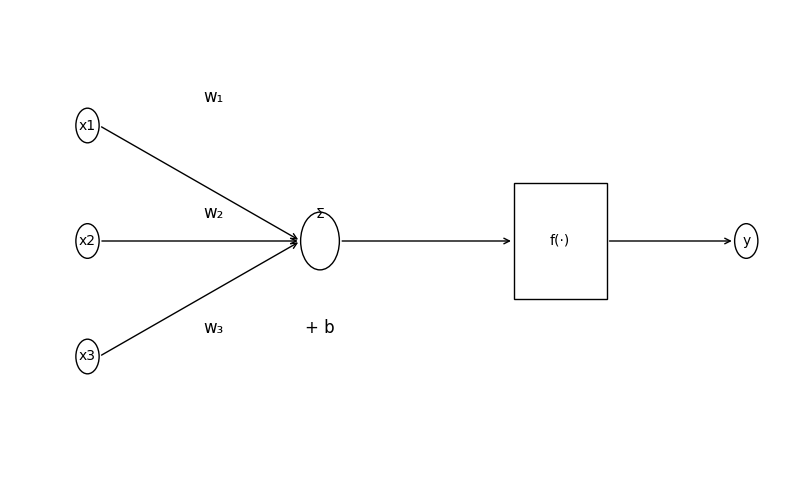

In [3]:
fig, ax = plt.subplots(figsize=(10, 6))

# Vector nodes
for i, y in enumerate([3, 2, 1]):
    ax.add_patch(plt.Circle((1, y), 0.15, fill=False))
    ax.text(1, y, f"x{i+1}", ha='center', va='center')

# Weighted sum circle
ax.add_patch(plt.Circle((4, 2), 0.25, fill=False))
ax.text(4, 2.2, "Σ", ha='center')

# Activation box
ax.add_patch(plt.Rectangle((6.5, 1.5), 1.2, 1, fill=False))
ax.text(7.1, 2, "f(·)", ha='center', va='center')

# Arrows: input to weighted sum
for y in [3, 2, 1]:
    ax.annotate("", xy=(3.75, 2), xytext=(1.15, y),
                arrowprops=dict(arrowstyle="->"))

# Arrow: weighted sum to activation
ax.annotate("", xy=(6.5, 2), xytext=(4.25, 2),
            arrowprops=dict(arrowstyle="->"))

# Arrow: Activation to output
ax.add_patch(plt.Circle((9.5, 2), 0.15, fill=False))
ax.text(9.5, 2, "y", ha='center', va='center')
ax.annotate("", xy=(9.35, 2), xytext=(7.7, 2),
            arrowprops=dict(arrowstyle="->"))

ax.text(2.5, 3.2, "w₁", fontsize=12)
ax.text(2.5, 2.2, "w₂", fontsize=12)
ax.text(2.5, 1.2, "w₃", fontsize=12)
ax.text(4, 1.2, "+ b", fontsize=12, ha='center')

ax.set_xlim(0, 10)
ax.set_ylim(0, 4)
ax.axis('off')

plt.show()

## **Figure 35. tanh activation function (smooth S-shaped curve)**

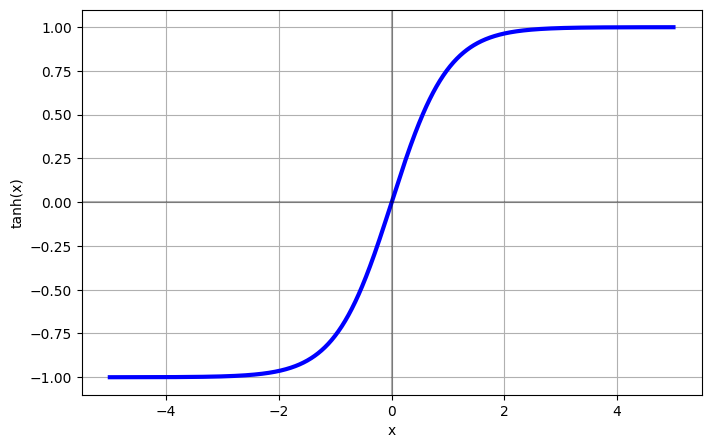

In [4]:
x = np.linspace(-5, 5, 1000)
y = np.tanh(x)

plt.figure(figsize=(8, 5))
plt.plot(x, y, 'b-', linewidth=3)
plt.xlabel('x')
plt.ylabel('tanh(x)')
# plt.title('Tanh Activation Function', fontweight='bold')
plt.grid()
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.show()

## **Figure 36. ReLU function (zero for negative inputs, linear for positive inputs)**

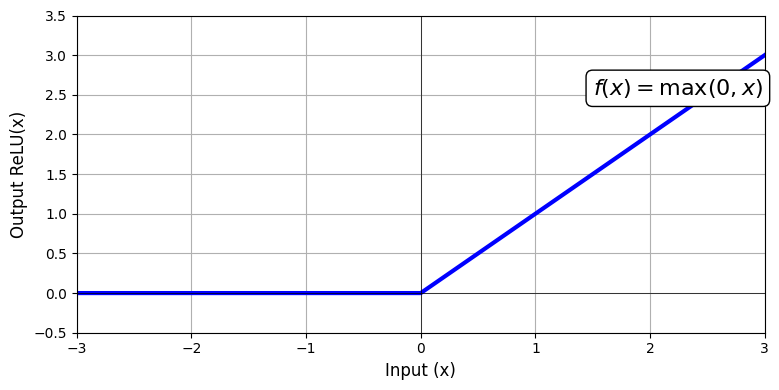

In [5]:
x = np.linspace(-3, 3, 1000)
y = np.maximum(0, x)


plt.figure(figsize=(8, 4))
plt.plot(x, y, 'b-', linewidth=3)
plt.grid()
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)

plt.xlabel('Input (x)', fontsize=12)
plt.ylabel('Output ReLU(x)', fontsize=12)
# plt.title('ReLU Activation Function: ReLU(x) = max(0, x)', fontsize=14, fontweight='bold')

plt.xlim(-3, 3)
plt.ylim(-0.5, 3.5)
plt.text(1.5, 2.5, r'$f(x) = \max(0, x)$', fontsize=16,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white"))

plt.tight_layout()
plt.show()

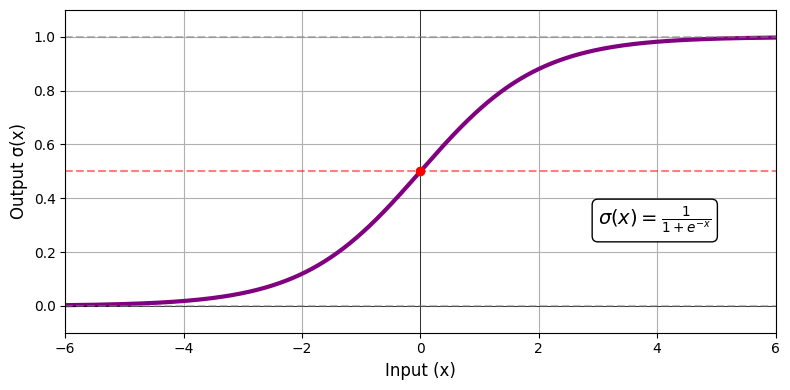

In [6]:
x = np.linspace(-6, 6, 1000)
y = 1 / (1 + np.exp(-x))

plt.figure(figsize=(8, 4))
plt.plot(x, y, 'purple', linewidth=3)
plt.grid()
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)
plt.axhline(y=0.5, color='red', linestyle='--', alpha=0.5)
plt.axhline(y=1, color='gray', linestyle='--', alpha=0.5)
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
plt.xlabel('Input (x)', fontsize=12)
plt.ylabel('Output σ(x)', fontsize=12)
# plt.title('Figure 6: Sigmoid Activation Function', fontsize=14, fontweight='bold')
plt.xlim(-6, 6)
plt.ylim(-0.1, 1.1)

plt.plot(0, 0.5, 'ro', markersize=6)
plt.text(3, 0.3, r'$\sigma(x) = \frac{1}{1 + e^{-x}}$', fontsize=14,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white"))

plt.tight_layout()
plt.show()

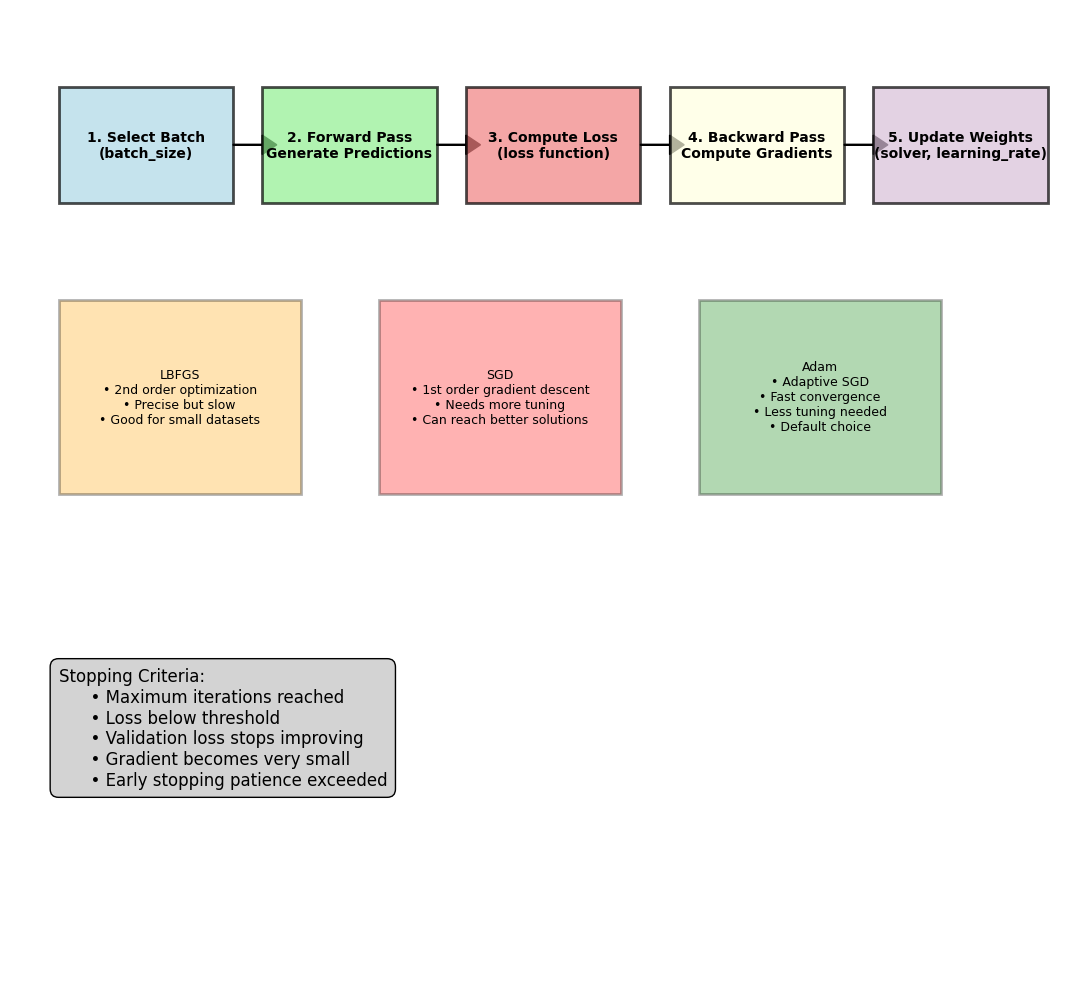

In [8]:
def plot_training_workflow():
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))

    # Training workflow steps
    steps = [
        (0.05, 0.8, "1. Select Batch\n(batch_size)", "lightblue"),
        (0.26, 0.8, "2. Forward Pass\nGenerate Predictions", "lightgreen"),
        (0.47, 0.8, "3. Compute Loss\n(loss function)", "lightcoral"),
        (0.68, 0.8, "4. Backward Pass\nCompute Gradients", "lightyellow"),
        (0.89, 0.8, "5. Update Weights\n(solver, learning_rate)", "thistle")]

    block_width = 0.18
    block_height = 0.12
    text_offset_x = block_width / 2
    text_offset_y = block_height / 2

    # Steps
    for i, (x, y, text, color) in enumerate(steps):
        rect = patches.Rectangle((x, y), block_width, block_height, linewidth=2,
                               edgecolor='black', facecolor=color, alpha=0.7)
        ax.add_patch(rect)
        ax.text(x + text_offset_x, y + text_offset_y, text, ha='center', va='center',
                fontsize=10, fontweight='bold')

        # Arrows between steps
        if i < len(steps) - 1:
            arrow_start_x = x + block_width
            arrow_end_x = steps[i+1][0]
            arrow_y = y + text_offset_y
            ax.arrow(arrow_start_x, arrow_y, arrow_end_x - arrow_start_x, 0,
                    head_width=0.02, head_length=0.015, fc='k', ec='k')

    # Solver comparison
    solvers = [
        (0.05, 0.5, "LBFGS\n• 2nd order optimization\n• Precise but slow\n• Good for small datasets", "orange"),
        (0.38, 0.5, "SGD\n• 1st order gradient descent\n• Needs more tuning\n• Can reach better solutions", "red"),
        (0.71, 0.5, "Adam\n• Adaptive SGD\n• Fast convergence\n• Less tuning needed\n• Default choice", "green")]

    solver_block_width = 0.25
    solver_block_height = 0.2

    for x, y, text, color in solvers:
        rect = patches.Rectangle((x, y), solver_block_width, solver_block_height, linewidth=2,
                               edgecolor='black', facecolor=color, alpha=0.3)
        ax.add_patch(rect)
        ax.text(x + solver_block_width/2, y + solver_block_height/2, text, ha='center', va='center',
                fontsize=9)

    # Stopping criteria
    stopping_text = """Stopping Criteria:
      • Maximum iterations reached
      • Loss below threshold
      • Validation loss stops improving
      • Gradient becomes very small
      • Early stopping patience exceeded"""
    ax.text(0.05, 0.2, stopping_text, fontsize = 12,
            bbox=dict(boxstyle = "round, pad = 0.5", facecolor = "lightgray"))

    ax.set_xlim(0, 1.1)
    ax.set_ylim(0, 1)
    ax.set_aspect('equal')
    ax.axis('off')
    # plt.title('Neural Network Training Workflow and Hyperparameters',
    #           fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()

plot_training_workflow()

## **Code Block 7.1:**
**Data ingestion**


In [9]:
df = fetch_ucirepo(id = 222)
print(df.data.features.head())
print(df.data.targets.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married        NaN      no     1506     yes   no   
4   33           NaN   single        NaN      no        1      no   no   

  contact  day_of_week month  duration  campaign  pdays  previous poutcome  
0     NaN            5   may       261         1     -1         0      NaN  
1     NaN            5   may       151         1     -1         0      NaN  
2     NaN            5   may        76         1     -1         0      NaN  
3     NaN            5   may        92         1     -1         0      NaN  
4     NaN            5   may       198         1     -1         0      NaN  
    y
0  no
1  no
2  no
3  no
4  no


In [10]:
X = df.data.features
y = df.data.targets.squeeze()
y = (y == "yes").astype(int)
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
print(categorical_cols)
print(y.value_counts())

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
y
0    39922
1     5289
Name: count, dtype: int64


## **Code Block 7.2:**
**Implementing Baseline CatBoost Classifier: Handling Categorical Data and Model Evaluation**


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, stratify = y, random_state = 42)

# Fill NaN values in categorical columns with 'Unknown'
for col in categorical_cols:
    X_train[col] = X_train[col].fillna('Unknown')
    X_test[col] = X_test[col].fillna('Unknown')

model = CatBoostClassifier(
    loss_function = 'Logloss',
    eval_metric = 'AUC',
    depth = 6,
    learning_rate = 0.05,
    iterations = 1000,
    random_seed = 42,
    verbose = 100)

model.fit(
    X_train, y_train,
    cat_features=categorical_cols,
    eval_set=(X_test, y_test))

pred_proba = model.predict_proba(X_test)[:, 1]
pred = model.predict(X_test)

print("AUC:", roc_auc_score(y_test, pred_proba))
print(classification_report(y_test, pred))

0:	test: 0.8527361	best: 0.8527361 (0)	total: 137ms	remaining: 2m 17s
100:	test: 0.9256270	best: 0.9256270 (100)	total: 14.6s	remaining: 2m 9s
200:	test: 0.9302794	best: 0.9302794 (200)	total: 24.1s	remaining: 1m 35s
300:	test: 0.9322939	best: 0.9322939 (300)	total: 36.4s	remaining: 1m 24s
400:	test: 0.9332098	best: 0.9332180 (395)	total: 45s	remaining: 1m 7s
500:	test: 0.9338425	best: 0.9338776 (495)	total: 53.5s	remaining: 53.2s
600:	test: 0.9344357	best: 0.9344677 (587)	total: 1m 1s	remaining: 40.7s
700:	test: 0.9346616	best: 0.9346709 (692)	total: 1m 9s	remaining: 29.7s
800:	test: 0.9347820	best: 0.9348115 (761)	total: 1m 22s	remaining: 20.4s
900:	test: 0.9349028	best: 0.9349767 (866)	total: 1m 38s	remaining: 10.8s
999:	test: 0.9349333	best: 0.9349767 (866)	total: 1m 55s	remaining: 0us

bestTest = 0.9349767345
bestIteration = 866

Shrink model to first 867 iterations.
AUC: 0.934976734496273
              precision    recall  f1-score   support

           0       0.94      0.96    

## **Code Block 7.3:**
**Feature importances from the trained model**


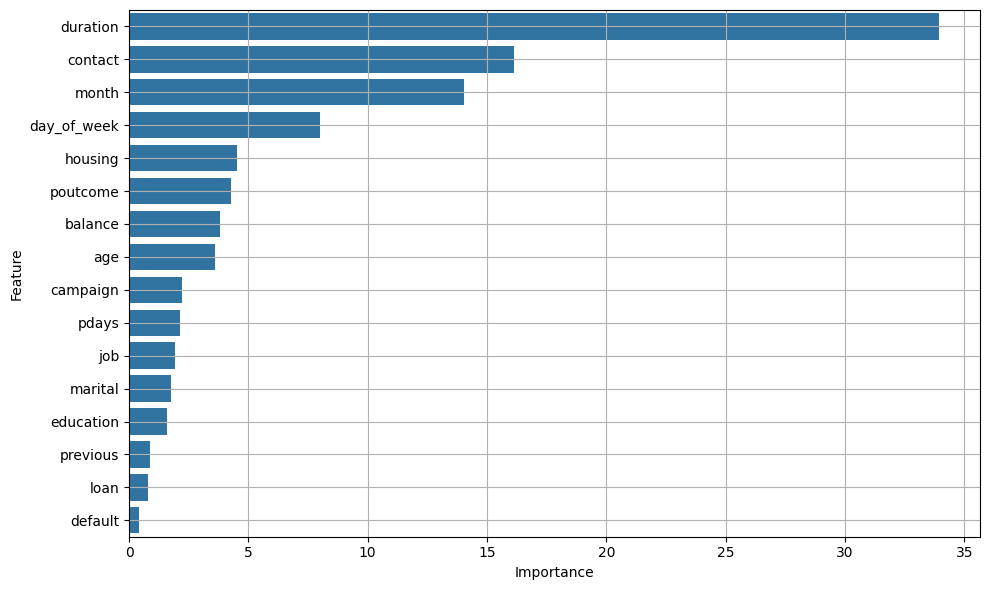

In [12]:
feature_importances = model.get_feature_importance()
feature_names = X_train.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (10, 6))
sns.barplot(x='Importance', y='Feature', data = importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid()
plt.tight_layout()
plt.show()

## **Code Block 7.4:**
**Visualizing Classifier Performance: ROC Curve, AUC, Precision-Recall Curve, and Average Precision**


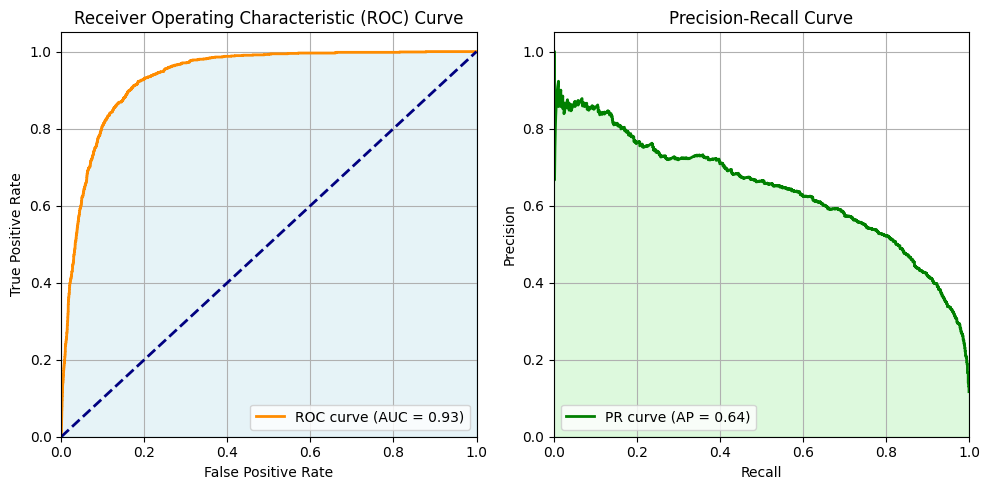

In [13]:
# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, pred_proba)
roc_auc = auc(fpr, tpr)

# PRC and AUPRC
precision, recall, _ = precision_recall_curve(y_test, pred_proba)
pr_auc = average_precision_score(y_test, pred_proba)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# ROC
axes[0].plot(fpr, tpr, color = 'darkorange', lw = 2, label = f'ROC curve (AUC = {roc_auc:.2f})')
axes[0].plot([0, 1], [0, 1], color = 'navy', lw=2, linestyle='--')
axes[0].fill_between(fpr, tpr, color = 'lightblue', alpha=0.3)
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Receiver Operating Characteristic (ROC) Curve')
axes[0].legend(loc='lower right')
axes[0].grid(True)

# PRC
axes[1].plot(recall, precision, color = 'green', lw = 2, label = f'PR curve (AP = {pr_auc:.2f})')
axes[1].fill_between(recall, precision, color = 'lightgreen', alpha = 0.3)
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Precision-Recall Curve')
axes[1].legend(loc='lower left')
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [14]:
neg, pos = np.bincount(y)
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 45211
    Positive: 5289 (11.70% of total)



In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


## **Code Block 7.5:**
**Preprocessing Pipeline: Encoding, Scaling, and Train–Validation–Test Split**


In [16]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing',
                    'loan', 'contact', 'month', 'poutcome']

numerical_cols = ['age', 'balance', 'day_of_week', 'duration',
                  'campaign', 'pdays', 'previous']

X = X.copy()

ohe = OneHotEncoder(sparse_output = False, drop = None)
X_cat = pd.DataFrame(
    ohe.fit_transform(X[categorical_cols]),
    columns=ohe.get_feature_names_out(categorical_cols),
    index=X.index)

X_num = X[numerical_cols].astype(float)
scaler = RobustScaler()
X_num = pd.DataFrame(
    scaler.fit_transform(X_num),
    columns=numerical_cols,
    index=X.index)

X_processed = pd.concat([X_cat, X_num], axis=1)

X_train_full, X_test, y_train_full, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.25, random_state=42, stratify=y_train_full)

train_features = X_train.to_numpy()
val_features   = X_val.to_numpy()
test_features  = X_test.to_numpy()

train_labels = y_train.to_numpy().reshape(-1, 1)
val_labels   = y_val.to_numpy().reshape(-1, 1)
test_labels  = y_test.to_numpy().reshape(-1, 1)

print(f'Average class probability in training set:   {train_labels.mean():.4f}')
print(f'Average class probability in validation set: {val_labels.mean():.4f}')
print(f'Average class probability in test set:       {test_labels.mean():.4f}')

Average class probability in training set:   0.1170
Average class probability in validation set: 0.1170
Average class probability in test set:       0.1170


## **Code Block 7.6:**
**Generating Min/Max and 1st/99th percentile**


In [17]:
print(np.min(train_features), np.max(train_features))
print(np.percentile(train_features, 1), np.percentile(train_features, 99))

-5.379793510324483 872.0
-0.6 2.154682890855457


In [ ]:
# train_features = np.clip(train_features, -5, 5)
# val_features = np.clip(val_features, -5, 5)
# test_features = np.clip(test_features, -5, 5)

# print('Training labels shape:', train_labels.shape)
# print('Validation labels shape:', val_labels.shape)
# print('Test labels shape:', test_labels.shape)

# print('Training features shape:', train_features.shape)
# print('Validation features shape:', val_features.shape)
# print('Test features shape:', test_features.shape)

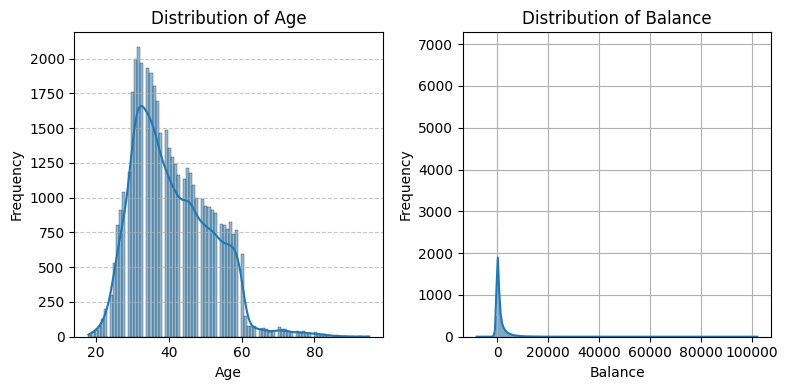

In [18]:
plt.figure(figsize = (8, 4))

plt.subplot(1, 2, 1)
sns.histplot(X['age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
sns.histplot(X['balance'], kde=True)
plt.title('Distribution of Balance')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.grid()

plt.tight_layout()
plt.show()

## **Distribution of Categorical Features (e.g., 'job', 'marital')**

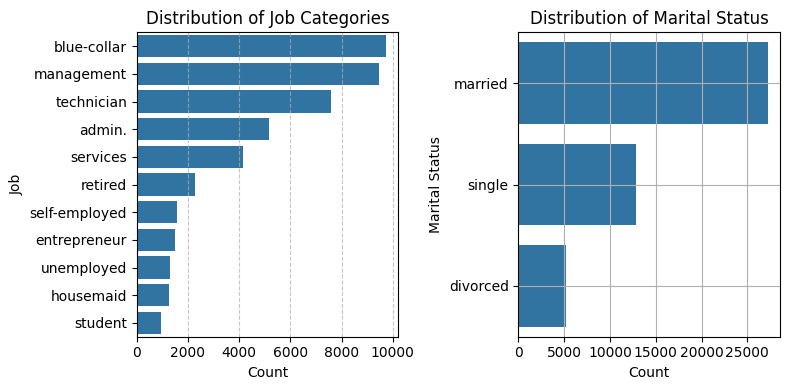

In [19]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.countplot(y=X['job'], order=X['job'].value_counts().index)
plt.title('Distribution of Job Categories')
plt.xlabel('Count')
plt.ylabel('Job')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
sns.countplot(y=X['marital'], order=X['marital'].value_counts().index)
plt.title('Distribution of Marital Status')
plt.xlabel('Count')
plt.ylabel('Marital Status')
plt.grid()

plt.tight_layout()
plt.show()

## **Code Block 7.7:**
**Baseline model**


In [20]:
def baseline_model():
    model = keras.Sequential([
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dense(32, activation="relu"),
        keras.layers.Dense(1, activation="sigmoid")])

    model.compile(
        optimizer = keras.optimizers.Adam(1e-3),
        loss = keras.losses.BinaryCrossentropy(),
        metrics=[
            keras.metrics.AUC(name = "auc"),
            keras.metrics.AUC(name = "prc", curve = "PR"),
            keras.metrics.Precision(name = 'precision'),
            keras.metrics.Recall(name = 'recall')])
    return model

model_baseline = baseline_model()

baseline_history = model_baseline.fit(
    train_features, train_labels,
    validation_data=(val_features, val_labels),
    epochs = 50,
    batch_size = 128,
    verbose = 0)

train_prc = baseline_history.history["prc"]
val_prc = baseline_history.history["val_prc"]

print(f"Final Training PRC: {train_prc[-1]:.4f}")
print(f"Final Validation PRC: {val_prc[-1]:.4f}")
print(f"Best Validation PRC:  {max(val_prc):.4f}")

Final Training PRC: 0.7498
Final Validation PRC: 0.5629
Best Validation PRC:  0.6066


## **Code Block 7.8:**
**Advanced Hyperparameter Tuning: Improving PR-AUC Through Bias Initialization and Hyperband-Driven Neural Architecture Search**


In [21]:
neg, pos = np.bincount(y)
initial_bias = np.log(pos / neg)
bias_initializer = keras.initializers.Constant(initial_bias)

def build_model(hp):
    model = keras.Sequential()
    model.add(keras.Input(shape = (train_features.shape[-1],)))

    # Tune hidden layers
    n_layers = hp.Int("n_layers", min_value = 1, max_value = 4, step = 1)

    for i in range(n_layers):

        # Tune units
        n_units = hp.Int(f"n_units_{i}", min_value = 16, max_value = 512, step = 16)

        model.add(keras.layers.Dense(
            n_units,
            kernel_regularizer=keras.regularizers.l2(1e-4)))

        # Tune activation
        activation = hp.Choice(f"activation_{i}", values=["relu", "leakyrelu"])
        if activation == "leakyrelu":
            slope = hp.Float(f"slope_{i}", min_value = 0.01, max_value = 0.2, step = 0.01)
            model.add(keras.layers.LeakyReLU(negative_slope=slope))
        else:
            model.add(keras.layers.Activation("relu"))

        # Tune dropout
        dropout_rate = hp.Float(f"dropout_{i}", min_value = 0.0, max_value = 0.5, step = 0.05)
        if dropout_rate > 0:
            model.add(keras.layers.Dropout(dropout_rate))

    # Output layer with bias initializer
    model.add(keras.layers.Dense(
        1,
        activation = 'sigmoid',
        bias_initializer = bias_initializer))

    learning_rate = hp.Float("learning_rate", min_value = 1e-4, max_value = 1e-2, sampling = "log")
    optimizer = keras.optimizers.Adam(learning_rate = learning_rate, clipnorm = 1.0)

    model.compile(
        optimizer = optimizer,
        loss = keras.losses.BinaryCrossentropy(),
        metrics=[
            keras.metrics.AUC(name = "auc"),
            keras.metrics.AUC(name = "prc", curve = "PR")])
    return model

tuner = kt.Hyperband(
    build_model,
    objective = kt.Objective("val_prc", direction = "max"),
    max_epochs = 50,
    factor = 3,
    directory = "tuner_dir",
    project_name = "dynamic_anomaly_tuning")

stop_early = keras.callbacks.EarlyStopping(
    monitor = "val_prc",
    mode = "max",
    patience = 10,
    restore_best_weights = True)

tensorboard_cb = keras.callbacks.TensorBoard(log_dir = "logs")

batch_size_options = [32, 64, 128, 256, 512, 1024, train_features.shape[0]]
batch_size_options = sorted(batch_size_options)
batch_size_results = {}

for batch_size in batch_size_options:
    print(f"\nTesting batch_size: {batch_size}")

    tuner.search(
        train_features, train_labels,
        validation_data = (val_features, val_labels),
        epochs = 50,
        batch_size = batch_size,
        callbacks = [stop_early, tensorboard_cb],
        verbose = 1)

    best_trial = tuner.oracle.get_best_trials(num_trials=1)[0]
    batch_size_results[batch_size] = best_trial.score
    print(f"Best PRC Score so far = {best_trial.score:.4f}")

best_batch_size = max(batch_size_results, key = batch_size_results.get)
best_hp = tuner.get_best_hyperparameters(num_trials = 1)[0]

print("\n" + "="*70)
print("FINAL HYPERPARAMETER RESULTS")
print("="*70)
for k, v in best_hp.values.items():
    if not k.startswith("tuner/"):
        print(f"{k}: {v}")
print(f"\nOptimal Batch Size: {best_batch_size}")
print(f"Best PRC Score: {batch_size_results[best_batch_size]:.4f}")

final_model = build_model(best_hp)
history = final_model.fit(
    train_features, train_labels,
    validation_data = (val_features, val_labels),
    epochs = 50,
    batch_size = best_batch_size,
    callbacks = [stop_early, tensorboard_cb],
    verbose = 1)

Trial 90 Complete [00h 02m 33s]
val_prc: 0.5951954126358032

Best val_prc So Far: 0.6071854829788208
Total elapsed time: 01h 23m 11s
Best PRC Score so far = 0.6072

Testing batch_size: 64
Best PRC Score so far = 0.6072

Testing batch_size: 128
Best PRC Score so far = 0.6072

Testing batch_size: 256
Best PRC Score so far = 0.6072

Testing batch_size: 512
Best PRC Score so far = 0.6072

Testing batch_size: 1024
Best PRC Score so far = 0.6072

Testing batch_size: 27126
Best PRC Score so far = 0.6072

FINAL HYPERPARAMETER RESULTS
n_layers: 3
n_units_0: 160
activation_0: leakyrelu
dropout_0: 0.1
learning_rate: 0.0008418115733884539
slope_0: 0.19
n_units_1: 400
activation_1: relu
dropout_1: 0.0
slope_1: 0.05
n_units_2: 496
activation_2: relu
dropout_2: 0.35000000000000003
slope_2: 0.15000000000000002
n_units_3: 496
activation_3: relu
dropout_3: 0.35000000000000003
slope_3: 0.09999999999999999

Optimal Batch Size: 32
Best PRC Score: 0.6072

Training final model using optimal hyperparameters
E

## **Figure 41. Neural Network Architecture**

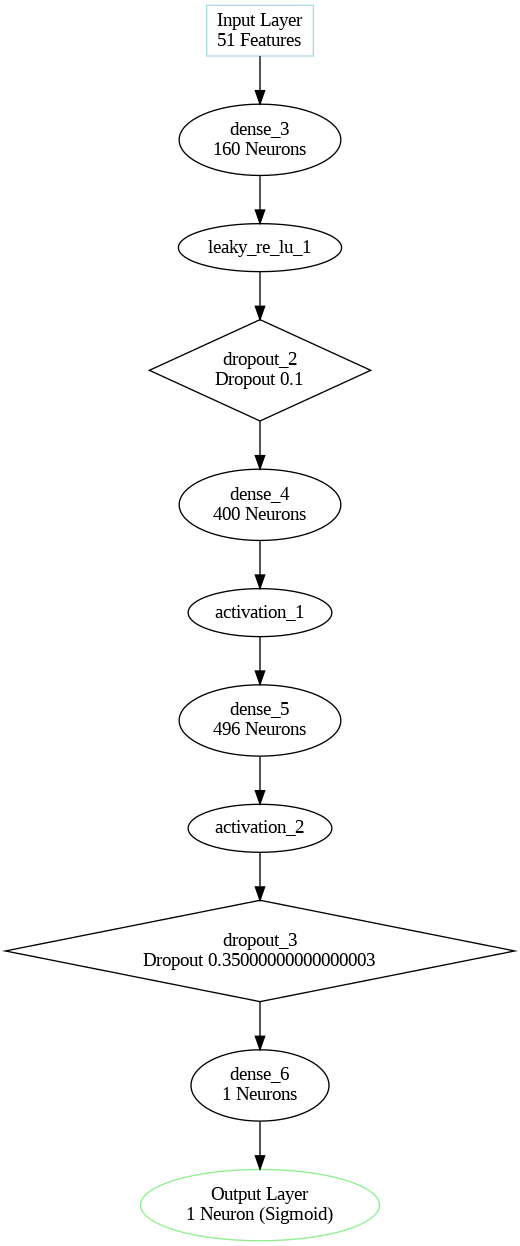

In [22]:
def visualize_model_graph(model):
    dot = graphviz.Digraph(comment='Neural Network Architecture', format='png')

    input_features = final_model.input_shape[-1]
    dot.node('Input', f'Input Layer\n{input_features} Features', shape='box', color='lightblue')

    for idx, layer in enumerate(final_model.layers):
        layer_name = layer.name
        if isinstance(layer, layers.Dense):
            dot.node(layer_name, f'{layer_name}\n{layer.units} Neurons', shape='ellipse')
        elif isinstance(layer, layers.Dropout):
            dot.node(layer_name, f'{layer_name}\nDropout {layer.rate}', shape='diamond')
        elif isinstance(layer, layers.InputLayer):
            continue

        if idx == 0 or isinstance(final_model.layers[idx-1], layers.InputLayer):
            dot.edge('Input', layer_name)
        else:
            dot.edge(model.layers[idx - 1].name, layer_name)

    output_layer_name = model.layers[-1].name
    dot.node('Output', 'Output Layer\n1 Neuron (Sigmoid)', shape='ellipse', color='lightgreen')
    dot.edge(output_layer_name, 'Output')

    return dot

dnn_graph = visualize_model_graph(final_model)
file_name = 'dnn_model_graph'
dnn_graph.render(file_name, view=False, cleanup=True)
display(Image(filename=f'{file_name}.png'))

## **Code Block 7.9:**
**Bias Initialization Experiments and Model Training**


Final Validation PRC without bias    :  0.5925455093383789
Final Validation PRC with bias       :  0.6006932854652405
Final Validation Loss without bias   :  0.2162560373544693
Final Validation Loss with bias      :  0.21962688863277435


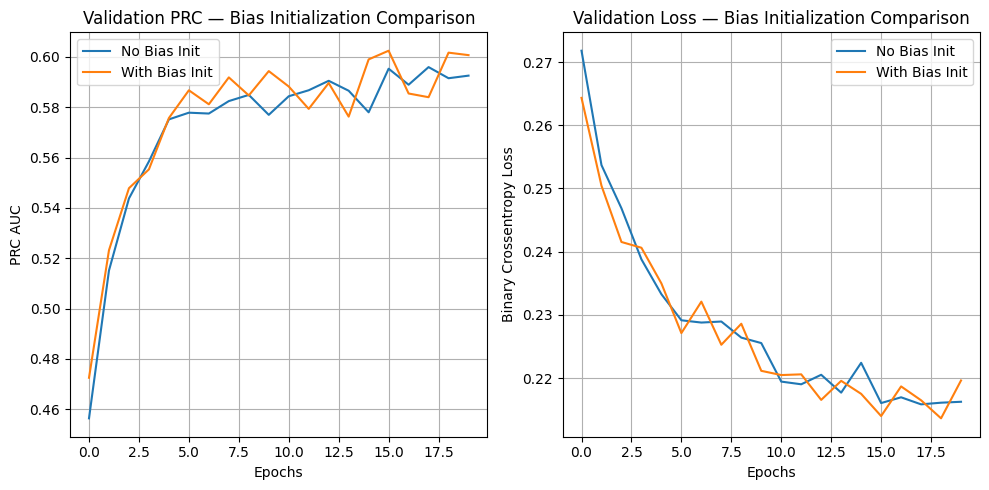

In [23]:
def build_model(with_bias_init):
    neg, pos = np.bincount(y_train)
    initial_bias = np.log(pos / neg)

    bias_init = keras.initializers.Constant(initial_bias) if with_bias_init else "zeros"

    model = keras.Sequential([
        layers.Dense(128, kernel_regularizer = keras.regularizers.l2(1e-4)),
        layers.LeakyReLU(negative_slope = 0.1),
        layers.Dropout(0.2),

        layers.Dense(64, kernel_regularizer=keras.regularizers.l2(1e-4)),
        layers.LeakyReLU(negative_slope = 0.1),
        layers.Dropout(0.2),

        layers.Dense(1, activation = "sigmoid", bias_initializer = bias_init)])

    model.compile(
        optimizer = keras.optimizers.Adam(learning_rate = 1e-3),
        loss = keras.losses.BinaryCrossentropy(),
        metrics = [
            keras.metrics.AUC(name = "auc"),
            keras.metrics.AUC(name = "prc", curve = "PR")])
    return model

EPOCHS = 20

model_no_bias = build_model(with_bias_init=False)
hist_no_bias = model_no_bias.fit(
    train_features, train_labels,
    validation_data = (val_features, val_labels),
    epochs = EPOCHS,
    batch_size = best_batch_size,
    verbose = 0)

model_bias = build_model(with_bias_init=True)
hist_bias = model_bias.fit(
    train_features, train_labels,
    validation_data = (val_features, val_labels),
    epochs = EPOCHS,
    batch_size = best_batch_size,
    verbose = 0)

print("Final Validation PRC without bias    : ", hist_no_bias.history["val_prc"][-1])
print("Final Validation PRC with bias       : ", hist_bias.history["val_prc"][-1])
print("Final Validation Loss without bias   : ", hist_no_bias.history["val_loss"][-1])
print("Final Validation Loss with bias      : ", hist_bias.history["val_loss"][-1])


fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))

# PRC
ax1.plot(hist_no_bias.history["val_prc"], label = "No Bias Init")
ax1.plot(hist_bias.history["val_prc"], label = "With Bias Init")
ax1.set_title("Validation PRC — Bias Initialization Comparison")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("PRC AUC")
ax1.legend()
ax1.grid(True)

# Loss
ax2.plot(hist_no_bias.history["val_loss"], label="No Bias Init")
ax2.plot(hist_bias.history["val_loss"], label="With Bias Init")
ax2.set_title("Validation Loss — Bias Initialization Comparison")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Binary Crossentropy Loss")
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

## **Code Block 7.10:**
**Evaluation of Model Architectures: Impact of Bias Initialization on ROC-AUC and Precision-Recall Performance**


283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Careful Bias Model — ROC-AUC: 0.9222, AUPRC: 0.5916
283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Zero Bias Model — ROC-AUC: 0.9230, AUPRC: 0.5916
283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Baseline Model — ROC-AUC: 0.9165, AUPRC: 0.5560


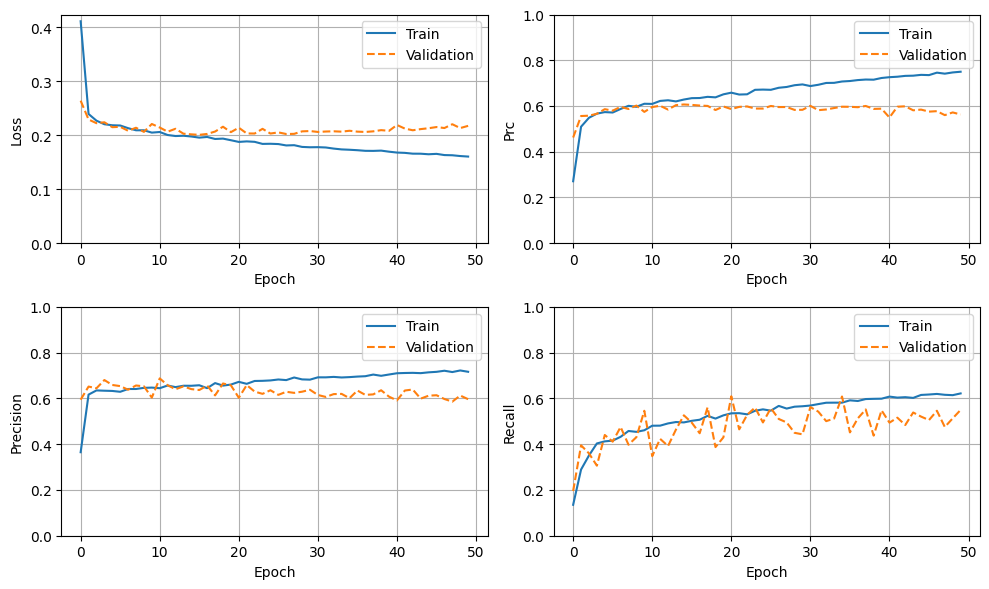

In [24]:
model_list = [
    (model_bias, "Careful Bias"),
    (model_no_bias, "Zero Bias"),
    (model_baseline, "Baseline")]

preds_dict = {}
auc_scores = {}
prc_scores = {}

for model, name in model_list:
    preds = model.predict(test_features).ravel()
    preds_dict[name] = preds
    auc = roc_auc_score(test_labels, preds)
    prc = average_precision_score(test_labels, preds)
    auc_scores[name] = auc
    prc_scores[name] = prc
    print(f"{name} Model — ROC-AUC: {auc:.4f}, AUPRC: {prc:.4f}")

def plot_metrics(history):
    metrics = ['loss', 'prc', 'precision', 'recall']

    plt.figure(figsize=(10, 6))
    for n, metric in enumerate(metrics):
        name = metric.replace("_", " ").capitalize()
        plt.subplot(2, 2, n + 1)
        plt.plot(history.epoch, history.history[metric], label='Train')
        plt.plot(history.epoch, history.history['val_' + metric], linestyle='--', label='Validation')
        plt.xlabel('Epoch')
        plt.ylabel(name)

        if metric == 'loss':
            plt.ylim(bottom=0)
        else:
            plt.ylim([0, 1])

        plt.legend()
        plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_metrics(baseline_history)

## **Code Block 7.11:**
**Confusion Matrix Visualization on Test data**


848/848 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Baseline Model Results:
loss: 0.2272
compile_metrics: 0.9127


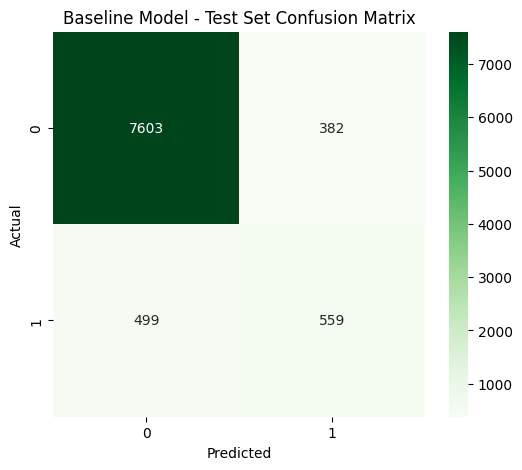


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      7985
           1       0.59      0.53      0.56      1058

    accuracy                           0.90      9043
   macro avg       0.77      0.74      0.75      9043
weighted avg       0.90      0.90      0.90      9043



In [25]:
train_predictions_baseline = model_baseline.predict(train_features, batch_size=best_batch_size)
test_predictions_baseline = model_baseline.predict(test_features, batch_size=best_batch_size)

baseline_results = model_baseline.evaluate(test_features, test_labels, batch_size=best_batch_size, verbose=0)

print("Baseline Model Results:")
for name, value in zip(model_baseline.metrics_names, baseline_results):
    print(f"{name}: {value:.4f}")

test_pred_binary = (test_predictions_baseline > 0.5).astype(int)
cm = confusion_matrix(test_labels, test_pred_binary)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens') # Changed 'green' to 'Greens'
plt.title('Baseline Model - Test Set Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nClassification Report:")
print(classification_report(test_labels, test_pred_binary))

## **Code Block 7.12:**
**Threshold Change: False Negative vs. False Positive Trade-off Analysis**



========== Threshold = 0.1 ==========
True Negatives (Legit correctly detected):   6573
False Positives (Legit flagged as fraud):    1412
False Negatives (Frauds missed):             129
True Positives (Frauds detected):            929
Total Frauds:                                1058

========== Threshold = 0.01 ==========
True Negatives (Legit correctly detected):   4870
False Positives (Legit flagged as fraud):    3115
False Negatives (Frauds missed):             32
True Positives (Frauds detected):            1026
Total Frauds:                                1058


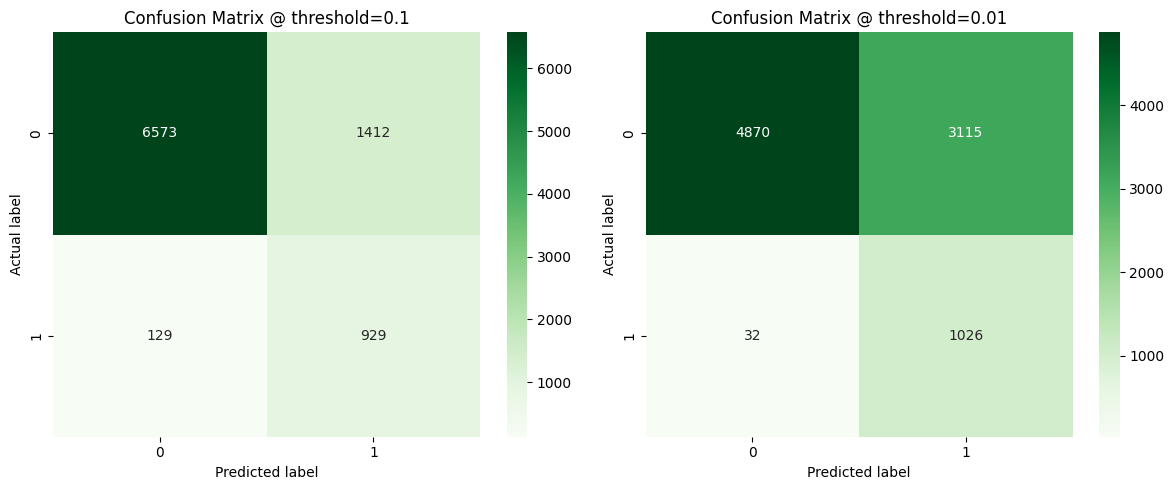

In [26]:
def plot_cm(labels, predictions, thresholds = [0.1, 0.01]):
    fig, axes = plt.subplots(1, len(thresholds), figsize = (12, 5))

    if len(thresholds) == 1:
        axes = [axes]

    for ax, th in zip(axes, thresholds):
        cm = confusion_matrix(labels, (predictions > th).astype(int))

        sns.heatmap(cm, annot = True, fmt = "d", cmap = 'Greens', ax = ax)
        ax.set_title(f"Confusion Matrix @ threshold={th}")
        ax.set_xlabel("Predicted label")
        ax.set_ylabel("Actual label")

        TN, FP, FN, TP = cm.ravel()

        print(f"\n========== Threshold = {th} ==========")
        print(f"True Negatives (Legit correctly detected):   {TN}")
        print(f"False Positives (Legit flagged as fraud):    {FP}")
        print(f"False Negatives (Frauds missed):             {FN}")
        print(f"True Positives (Frauds detected):            {TP}")
        print(f"Total Frauds:                                {TP + FN}")

    plt.tight_layout()
    plt.show()

plot_cm(
    test_labels,
    test_predictions_baseline,
    thresholds=[0.1, 0.01])

## **Code Block 7.13:**
**Model Validation: Cross-Set ROC and Precision-Recall Assessment**


Generating Train vs Test ROC and PRC curves for Baseline Model...
848/848 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


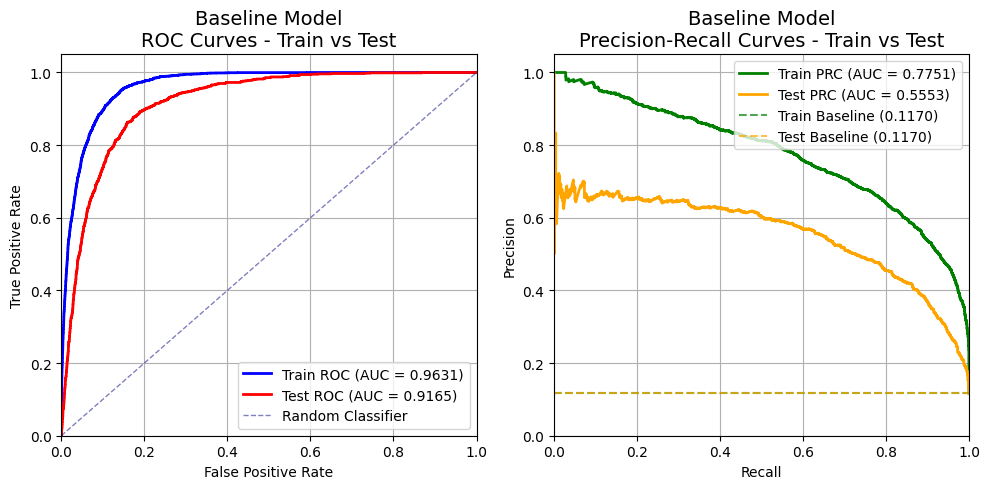


PERFORMANCE SUMMARY: Baseline Model
Metric          Training   Test       Gap       
--------------------------------------------------
ROC-AUC         0.9631     0.9165       0.0466
PRC-AUC         0.7751     0.5553       0.2199
Pos Rate        0.1170     0.1170      -0.0000


In [27]:
def plot_roc_prc(model, train_features, train_labels,
                 test_features, test_labels, model_name="Baseline Model"):

    train_predictions = model.predict(train_features, batch_size=best_batch_size).ravel()
    test_predictions = model.predict(test_features, batch_size=best_batch_size).ravel()

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    fpr_train, tpr_train, _ = roc_curve(train_labels, train_predictions)
    roc_auc_train = sklearn.metrics.auc(fpr_train, tpr_train)
    fpr_test, tpr_test, _ = roc_curve(test_labels, test_predictions)
    roc_auc_test = sklearn.metrics.auc(fpr_test, tpr_test)

    # ROC curves
    ax1.plot(fpr_train, tpr_train, color='blue', lw=2,
             label=f'Train ROC (AUC = {roc_auc_train:.4f})')
    ax1.plot(fpr_test, tpr_test, color='red', lw=2,
             label=f'Test ROC (AUC = {roc_auc_test:.4f})')
    ax1.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--', alpha=0.5, label='Random Classifier')
    ax1.set_xlim([0.0, 1.0])
    ax1.set_ylim([0.0, 1.05])
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.set_title(f'{model_name}\nROC Curves - Train vs Test', size=14)
    ax1.legend(loc="lower right")
    ax1.grid()

    precision_train, recall_train, _ = precision_recall_curve(train_labels, train_predictions)
    prc_auc_train = sklearn.metrics.auc(recall_train, precision_train)
    precision_test, recall_test, _ = precision_recall_curve(test_labels, test_predictions)
    prc_auc_test = sklearn.metrics.auc(recall_test, precision_test)

    baseline_train = np.sum(train_labels) / len(train_labels)
    baseline_test = np.sum(test_labels) / len(test_labels)

    # curves
    ax2.plot(recall_train, precision_train, color='green', lw=2,
             label=f'Train PRC (AUC = {prc_auc_train:.4f})')
    ax2.plot(recall_test, precision_test, color='orange', lw=2,
             label=f'Test PRC (AUC = {prc_auc_test:.4f})')
    ax2.axhline(y=baseline_train, color='green', linestyle='--', alpha=0.7,
                label=f'Train Baseline ({baseline_train:.4f})')
    ax2.axhline(y=baseline_test, color='orange', linestyle='--', alpha=0.7,
                label=f'Test Baseline ({baseline_test:.4f})')
    ax2.set_xlim([0.0, 1.0])
    ax2.set_ylim([0.0, 1.05])
    ax2.set_xlabel('Recall')
    ax2.set_ylabel('Precision')
    ax2.set_title(f'{model_name}\nPrecision-Recall Curves - Train vs Test', size=14)
    ax2.legend(loc="upper right")
    ax2.grid()

    plt.tight_layout()
    plt.show()

    print(f"\n{'='*60}")
    print(f"PERFORMANCE SUMMARY: {model_name}")
    print(f"{'='*60}")
    print(f"{'Metric':<15} {'Training':<10} {'Test':<10} {'Gap':<10}")
    print(f"{'-'*50}")
    print(f"{'ROC-AUC':<15} {roc_auc_train:<10.4f} {roc_auc_test:<10.4f} {roc_auc_train-roc_auc_test:>8.4f}")
    print(f"{'PRC-AUC':<15} {prc_auc_train:<10.4f} {prc_auc_test:<10.4f} {prc_auc_train-prc_auc_test:>8.4f}")
    print(f"{'Pos Rate':<15} {baseline_train:<10.4f} {baseline_test:<10.4f} {baseline_train-baseline_test:>8.4f}")

    return {
        'train_roc_auc': roc_auc_train,
        'test_roc_auc': roc_auc_test,
        'train_prc_auc': prc_auc_train,
        'test_prc_auc': prc_auc_test,
        'baseline_train': baseline_train,
        'baseline_test': baseline_test}

print("Generating Train vs Test ROC and PRC curves for Baseline Model...")
baseline_results = plot_roc_prc(
    model_baseline,
    train_features, train_labels,
    test_features, test_labels,
    model_name="Baseline Model")

## **Code Block 7.14:**
**Impact of Class Weighting**


In [28]:
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.57
Weight for class 1: 4.27


## **Code Block 7.15:**
**Class-Weighted Neural Network Implementation**


In [29]:
def build_weighted_model():
    model = keras.Sequential()
    model.add(keras.Input(shape = (train_features.shape[-1],)))

    n_layers = best_hp.get("n_layers")
    print(f"Using optimal architecture: {n_layers} layers")

    for i in range(n_layers):
        n_units = best_hp.get(f"n_units_{i}")

        model.add(keras.layers.Dense(
            n_units,
            kernel_regularizer=keras.regularizers.l2(1e-4)))

        activation = best_hp.get(f"activation_{i}")
        if activation == "leakyrelu":
            slope = best_hp.get(f"slope_{i}")
            model.add(keras.layers.LeakyReLU(negative_slope=slope))
        else:
            model.add(keras.layers.Activation("relu"))
        dropout_rate = best_hp.get(f"dropout_{i}")
        if dropout_rate > 0:
            model.add(keras.layers.Dropout(dropout_rate))

    model.add(keras.layers.Dense(
        1,
        activation = 'sigmoid',
        bias_initializer = bias_initializer))

    learning_rate = best_hp.get("learning_rate")
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate, clipnorm=1.0)

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.BinaryCrossentropy(),
        metrics=[
            keras.metrics.AUC(name="auc"),
            keras.metrics.AUC(name="prc", curve="PR"),
            keras.metrics.Precision(name='precision'),
            keras.metrics.Recall(name='recall')])

    return model

print("\n" + "="*70)
print("TRAINING WEIGHTED MODEL WITH OPTIMAL HYPERPARAMETERS")
print("="*70)

print("\nOptimal Configuration from Hyperparameter Tuning:")
print("-" * 50)
for k, v in best_hp.values.items():
    if not k.startswith("tuner/"):
        print(f"{k}: {v}")
print(f"batch_size: {best_batch_size}")
print(f"class_weight: {class_weight}")

weighted_model = build_weighted_model()
weighted_model.summary()

weighted_history = weighted_model.fit(
    train_features, train_labels,
    validation_data=(val_features, val_labels),
    class_weight = class_weight,
    epochs = 50,
    batch_size = best_batch_size,
    callbacks = [stop_early, tensorboard_cb],
    verbose = 1)

print("\nCOMPARISON: Weighted Model vs Original Optimal Model")
print("="*70)

print("\nTest Set Performance Comparison:")
print("-" * 50)
original_test_results = final_model.evaluate(test_features, test_labels, verbose=0)
original_pred = final_model.predict(test_features, batch_size=best_batch_size).ravel()
original_roc_auc = roc_auc_score(test_labels, original_pred)
original_prc_auc = average_precision_score(test_labels, original_pred)

# Weighted model performance
weighted_test_results = weighted_model.evaluate(test_features, test_labels, verbose=0)
weighted_pred = weighted_model.predict(test_features, batch_size=best_batch_size).ravel()
weighted_roc_auc = roc_auc_score(test_labels, weighted_pred)
weighted_prc_auc = average_precision_score(test_labels, weighted_pred)

print(f"{'Metric':<15} {'Original':<10} {'Weighted':<10} {'Improvement':<12}")
print("-" * 50)
print(f"{'ROC-AUC':<15} {original_roc_auc:<10.4f} {weighted_roc_auc:<10.4f} {weighted_roc_auc-original_roc_auc:>+10.4f}")
print(f"{'PRC-AUC':<15} {original_prc_auc:<10.4f} {weighted_prc_auc:<10.4f} {weighted_prc_auc-original_prc_auc:>+10.4f}")


TRAINING WEIGHTED MODEL WITH OPTIMAL HYPERPARAMETERS

Optimal Configuration from Hyperparameter Tuning:
--------------------------------------------------
n_layers: 3
n_units_0: 160
activation_0: leakyrelu
dropout_0: 0.1
learning_rate: 0.0008418115733884539
slope_0: 0.19
n_units_1: 400
activation_1: relu
dropout_1: 0.0
slope_1: 0.05
n_units_2: 496
activation_2: relu
dropout_2: 0.35000000000000003
slope_2: 0.15000000000000002
n_units_3: 496
activation_3: relu
dropout_3: 0.35000000000000003
slope_3: 0.09999999999999999
batch_size: 32
class_weight: {0: np.float64(0.566241671258955), 1: np.float64(4.274059368500661)}
Using optimal architecture: 3 layers


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 160)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 400)            │        64,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 496)            │       198,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 496)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 496)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │           497 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 272,113 (1.04 MB)

 Trainable params: 272,113 (1.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
848/848 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - auc: 0.7577 - loss: 0.9474 - prc: 0.2920 - precision: 0.3002 - recall: 0.5891 - val_auc: 0.9035 - val_loss: 0.5102 - val_prc: 0.5165 - val_precision: 0.3022 - val_recall: 0.9083
Epoch 2/50
848/848 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - auc: 0.8744 - loss: 0.4979 - prc: 0.4403 - precision: 0.3341 - recall: 0.8016 - val_auc: 0.9035 - val_loss: 0.4907 - val_prc: 0.5425 - val_precision: 0.3194 - val_recall: 0.8885
Epoch 3/50
848/848 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - auc: 0.8928 - loss: 0.4451 - prc: 0.5084 - precision: 0.3498 - recall: 0.8267 - val_auc: 0.9130 - val_loss: 0.3851 - val_prc: 0.5687 - val_precision: 0.4242 - val_recall: 0.8015
Epoch 4/50
848/848 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - auc: 0.9007 - loss: 0.4249 - prc: 0.5077 - precision: 0.3631 - recall: 0.8376 - val_auc: 0.9195 - val_loss: 0.4005 - val_prc: 0.5735 - val_precision: 0.3937 - val_recall: 0.8686
Epoch 5/50
848/848 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - auc: 0.8

## **Code Block 7.16:**
**Confusion Matrix Comparison: Original Model and Weighted Class**


loss            0.2298     0.4575        +0.2278
compile_metrics 0.9187     0.9117        -0.0070

Confusion Matrix Comparison (Threshold = 0.1):
--------------------------------------------------
Original Model - Recall: 0.9244 (Detected 978/1058 frauds)
Weighted Model - Recall: 0.9877 (Detected 1045/1058 frauds)
Recall Improvement: +0.0633
Fewer Missed Frauds: 67


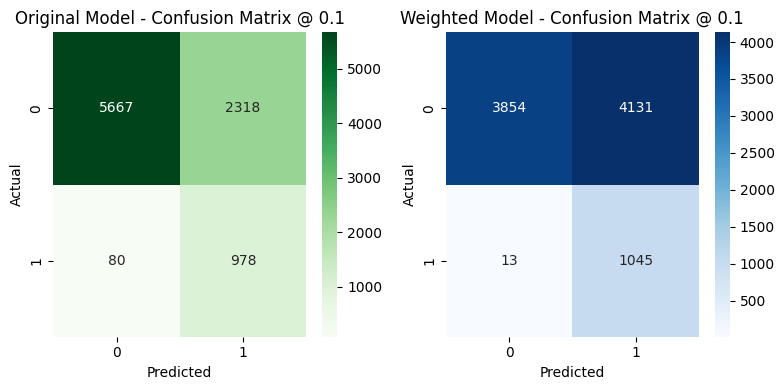

In [30]:
for i, metric in enumerate(final_model.metrics_names):
    if i < len(original_test_results) and i < len(weighted_test_results):
        original_val = original_test_results[i]
        weighted_val = weighted_test_results[i]
        improvement = weighted_val - original_val
        print(f"{metric:<15} {original_val:<10.4f} {weighted_val:<10.4f} {improvement:>+10.4f}")

print("\nConfusion Matrix Comparison (Threshold = 0.1):")
print("-" * 50)

original_binary = (original_pred > 0.1).astype(int)
weighted_binary = (weighted_pred > 0.1).astype(int)

original_cm = confusion_matrix(test_labels, original_binary)
weighted_cm = confusion_matrix(test_labels, weighted_binary)

# Calculate recall improvement (most important for fraud detection)
original_tn, original_fp, original_fn, original_tp = original_cm.ravel()
weighted_tn, weighted_fp, weighted_fn, weighted_tp = weighted_cm.ravel()

original_recall = original_tp / (original_tp + original_fn)
weighted_recall = weighted_tp / (weighted_tp + weighted_fn)

print(f"Original Model - Recall: {original_recall:.4f} (Detected {original_tp}/{original_tp+original_fn} frauds)")
print(f"Weighted Model - Recall: {weighted_recall:.4f} (Detected {weighted_tp}/{weighted_tp+weighted_fn} frauds)")
print(f"Recall Improvement: {weighted_recall - original_recall:+.4f}")
print(f"Fewer Missed Frauds: {original_fn - weighted_fn}")

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

sns.heatmap(original_cm, annot=True, fmt='d', cmap='Greens', ax=axes[0])
axes[0].set_title('Original Model - Confusion Matrix @ 0.1')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(weighted_cm, annot=True, fmt='d', cmap='Blues', ax=axes[1]) # Using a different cmap for distinction
axes[1].set_title('Weighted Model - Confusion Matrix @ 0.1')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

## **Code Block 7.17:**
**Precision-Recall Performance for Baseline and Weighted Models on Training and Test Sets**


848/848 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
848/848 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


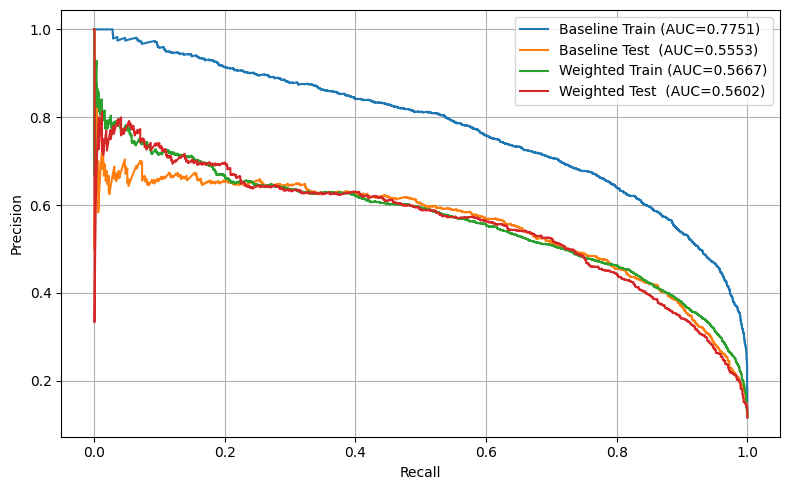

In [31]:
baseline_train_pred = model_baseline.predict(train_features)
baseline_test_pred = model_baseline.predict(test_features)

b_train_p, b_train_r, _ = precision_recall_curve(train_labels, baseline_train_pred)
b_test_p, b_test_r, _ = precision_recall_curve(test_labels, baseline_test_pred)

b_train_auc = sklearn_auc(b_train_r, b_train_p)
b_test_auc  = sklearn_auc(b_test_r, b_test_p)

weighted_train_pred = weighted_model.predict(train_features)
weighted_test_pred  = weighted_model.predict(test_features)

w_train_p, w_train_r, _ = precision_recall_curve(train_labels, weighted_train_pred)
w_test_p, w_test_r, _ = precision_recall_curve(test_labels, weighted_test_pred)

w_train_auc = sklearn_auc(w_train_r, w_train_p)
w_test_auc  = sklearn_auc(w_test_r, w_test_p)

plt.figure(figsize = (8, 5))

plt.plot(b_train_r, b_train_p, label=f"Baseline Train (AUC={b_train_auc:.4f})")
plt.plot(b_test_r,  b_test_p,  label=f"Baseline Test  (AUC={b_test_auc:.4f})")

plt.plot(w_train_r, w_train_p, label=f"Weighted Train (AUC={w_train_auc:.4f})")
plt.plot(w_test_r,  w_test_p,  label=f"Weighted Test  (AUC={w_test_auc:.4f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
# plt.title("PRC Curves: Baseline vs Weighted (Train & Test)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## **Code Block 7.18:**
**Original Dataset Distribution**

In [32]:
bool_train_labels = train_labels.flatten().astype(bool)

pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]
pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]

print(f"Positive samples (fraud): {len(pos_features):,}")
print(f"Negative samples (legitimate): {len(neg_features):,}")
print(f"Imbalance ratio: {len(neg_features)/len(pos_features):.1f}:1")
print(f"Positive features shape: {pos_features.shape}")
print(f"Negative features shape: {neg_features.shape}")

Positive samples (fraud): 3,173
Negative samples (legitimate): 23,953
Imbalance ratio: 7.5:1
Positive features shape: (3173, 51)
Negative features shape: (23953, 51)


## **Code Block 7.19:**
Balanced Dataset Creation through Random Oversampling**

In [33]:
pos_indices = np.arange(len(pos_features))
oversampled_pos_indices = np.random.choice(pos_indices, size=len(neg_features), replace=True)

resampled_pos_features = pos_features[oversampled_pos_indices]
resampled_pos_labels = pos_labels[oversampled_pos_indices]

print(f"Oversampled positive samples: {len(resampled_pos_features):,}")

Oversampled positive samples: 23,953


## **Combine oversampled positive class with all negative class samples**

In [34]:
resampled_features = np.concatenate([resampled_pos_features, neg_features], axis=0)
resampled_labels = np.concatenate([resampled_pos_labels, neg_labels], axis=0)

print(f"Combined dataset size: {len(resampled_features):,}")

Combined dataset size: 47,906


## **Code Block 7.20:**
**Shuffle the resampled dataset to prevent ordering biases**

In [35]:
indices = np.arange(len(resampled_labels))
np.random.shuffle(indices)

resampled_features = resampled_features[indices]
resampled_labels = resampled_labels[indices]

print(f"Total samples: {len(resampled_features):,}")
print(f"Feature dimension: {resampled_features.shape[1]}")
print(f"Class distribution: 50% positive, 50% negative")
print(f"Final dataset shape: {resampled_features.shape}")

Total samples: 47,906
Feature dimension: 51
Class distribution: 50% positive, 50% negative
Final dataset shape: (47906, 51)


## **Code Block 7.21:**
**Oversampling, Model Optimization, and Comparative Performance Analysis**


In [36]:
def build_optimal_model():
    model = keras.Sequential()
    model.add(keras.Input(shape = (train_features.shape[-1],)))

    n_layers = best_hp.get("n_layers")

    for i in range(n_layers):
        n_units = best_hp.get(f"n_units_{i}")

        model.add(keras.layers.Dense(
            n_units,
            kernel_regularizer = keras.regularizers.l2(1e-4)))
        activation = best_hp.get(f"activation_{i}")
        if activation == "leakyrelu":
            slope = best_hp.get(f"slope_{i}")
            model.add(keras.layers.LeakyReLU(negative_slope = slope))
        else:
            model.add(keras.layers.Activation("relu"))

        dropout_rate = best_hp.get(f"dropout_{i}")
        if dropout_rate > 0:
            model.add(keras.layers.Dropout(dropout_rate))

    model.add(keras.layers.Dense(
        1,
        activation = 'sigmoid',
        bias_initializer = bias_initializer))

    learning_rate = best_hp.get("learning_rate")
    optimizer = keras.optimizers.Adam(learning_rate = learning_rate, clipnorm = 1.0)

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.BinaryCrossentropy(),
        metrics=[
            keras.metrics.AUC(name = "auc"),
            keras.metrics.AUC(name = "prc", curve = "PR"),
            keras.metrics.Precision(name = 'precision'),
            keras.metrics.Recall(name = 'recall')])
    return model

resampled_model = build_optimal_model()

print(f"  Layers: {best_hp.get('n_layers')}")
print(f"  Learning rate: {best_hp.get('learning_rate'):.6f}")
print(f"  Batch size: {best_batch_size}")

print("\n TRAINING ON RESAMPLED DATA")
print("-" * 40)

resampled_history = resampled_model.fit(
    resampled_features, resampled_labels,
    validation_data = (val_features, val_labels),
    epochs= 50,
    batch_size = best_batch_size,
    callbacks = [stop_early, tensorboard_cb],
    verbose = 1)

# Define models for comparison
models = {
    'Baseline': final_model,
    'Weighted': weighted_model,
    'Resampled': resampled_model}

comparison_results = {}

print(f"\n{'Model':<12} {'ROC-AUC':<10} {'PRC-AUC':<10} {'Recall':<10} {'Precision':<10}")
print("-" * 60)

for name, model in models.items():
    test_predictions = model.predict(test_features, batch_size=best_batch_size).ravel()

    roc_auc = roc_auc_score(test_labels, test_predictions)
    prc_auc = average_precision_score(test_labels, test_predictions)

    # Recall and precision at threshold 0.1
    test_binary = (test_predictions > 0.1).astype(int)
    cm = confusion_matrix(test_labels, test_binary)
    tn, fp, fn, tp = cm.ravel()
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0

    comparison_results[name] = {
        'roc_auc': roc_auc,
        'prc_auc': prc_auc,
        'recall': recall,
        'precision': precision,
        'tp': tp, 'fp': fp, 'fn': fn, 'tn': tn}

    print(f"{name:<12} {roc_auc:<10.4f} {prc_auc:<10.4f} {recall:<10.4f} {precision:<10.4f}")

  Layers: 3
  Learning rate: 0.000842
  Batch size: 32

 TRAINING ON RESAMPLED DATA
----------------------------------------
Epoch 1/50
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - auc: 0.8197 - loss: 0.7595 - prc: 0.7669 - precision: 0.7650 - recall: 0.7359 - val_auc: 0.9214 - val_loss: 0.4560 - val_prc: 0.5731 - val_precision: 0.3555 - val_recall: 0.9178
Epoch 2/50
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - auc: 0.9087 - loss: 0.4131 - prc: 0.8777 - precision: 0.8145 - recall: 0.8741 - val_auc: 0.9179 - val_loss: 0.3449 - val_prc: 0.5610 - val_precision: 0.4113 - val_recall: 0.8214
Epoch 3/50
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - auc: 0.9193 - loss: 0.3841 - prc: 0.8882 - precision: 0.8272 - recall: 0.8898 - val_auc: 0.9253 - val_loss: 0.3924 - val_prc: 0.5572 - val_precision: 0.3914 - val_recall: 0.9197
Epoch 4/50
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - auc: 0.9244 - loss: 0.3647 - prc: 0.8950 - precision: 0.8341 - recall: 0.9069 - val_auc: 0.9241 - val_loss: 0

## **Code Block 7.22:**
**Performance Improvement Analysis: Class Imbalance Strategies vs. Baseline Model**

In [38]:
baseline_prc = comparison_results['Baseline']['prc_auc']
weighted_improvement = comparison_results['Weighted']['prc_auc'] - baseline_prc
resampled_improvement = comparison_results['Resampled']['prc_auc'] - baseline_prc

print(f"\nPRC-AUC Improvements over Baseline:")
print(f"  Weighted Model:  {weighted_improvement:+.4f} ({weighted_improvement/baseline_prc:+.1%})")
print(f"  Resampled Model: {resampled_improvement:+.4f} ({resampled_improvement/baseline_prc:+.1%})")

print(f"\nRecall at Threshold 0.1:")
for name in models.keys():
    recall = comparison_results[name]['recall']
    fn = comparison_results[name]['fn']
    print(f"  {name}: {recall:.4f} (Missed {fn} frauds)")


PRC-AUC Improvements over Baseline:
  Weighted Model:  -0.0287 (-4.9%)
  Resampled Model: -0.0245 (-4.2%)

Recall at Threshold 0.1:
  Baseline: 0.9244 (Missed 80 frauds)
  Weighted: 0.9877 (Missed 13 frauds)
  Resampled: 0.9641 (Missed 38 frauds)


## **Code Block 7.23:**
**ROC, PRC and Confusion Matrices Visualization**




283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


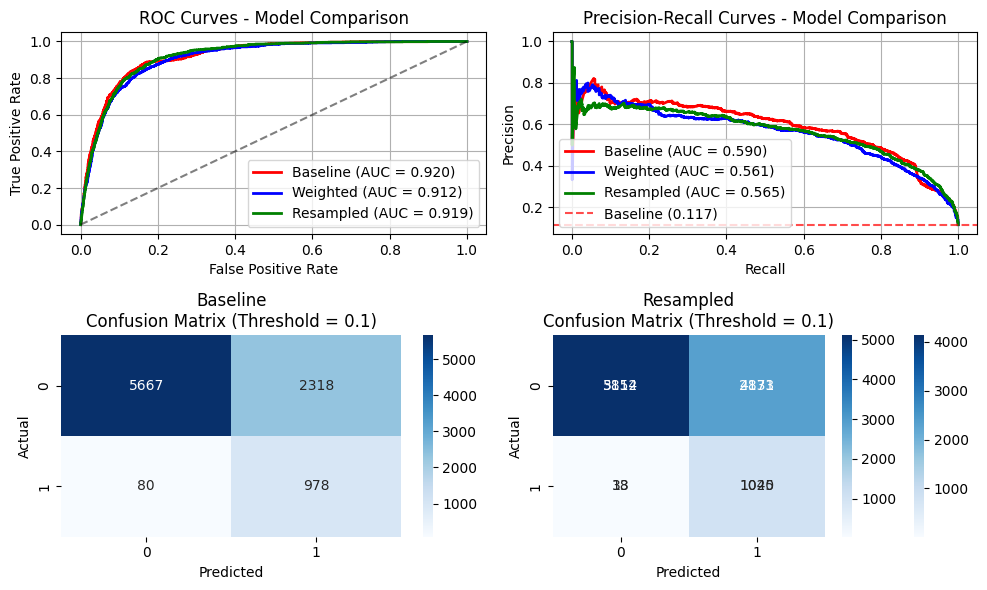

In [37]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 6))

# ROC Curves
colors = {'Baseline': 'red', 'Weighted': 'blue', 'Resampled': 'green'}
for name, model in models.items():
    test_predictions = model.predict(test_features, batch_size=best_batch_size).ravel()
    fpr, tpr, _ = roc_curve(test_labels, test_predictions)
    roc_auc = roc_auc_score(test_labels, test_predictions)
    ax1.plot(fpr, tpr, color=colors[name], lw=2, label=f'{name} (AUC = {roc_auc:.3f})')

ax1.plot([0, 1], [0, 1], 'k--', alpha=0.5)
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curves - Model Comparison')
ax1.legend()
ax1.grid()

# PRC Curves
for name, model in models.items():
    test_predictions = model.predict(test_features, batch_size=best_batch_size).ravel()
    precision, recall, _ = precision_recall_curve(test_labels, test_predictions)
    prc_auc = average_precision_score(test_labels, test_predictions)
    ax2.plot(recall, precision, color=colors[name], lw=2, label=f'{name} (AUC = {prc_auc:.3f})')

baseline_rate = np.sum(test_labels) / len(test_labels)
ax2.axhline(y=baseline_rate, color='red', linestyle='--', alpha=0.7, label=f'Baseline ({baseline_rate:.3f})')
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curves - Model Comparison')
ax2.legend()
ax2.grid()

threshold = 0.1
for idx, (name, model) in enumerate(models.items()):
    test_predictions = model.predict(test_features, batch_size=best_batch_size).ravel()
    test_binary = (test_predictions > threshold).astype(int)
    cm = confusion_matrix(test_labels, test_binary)

    ax = ax3 if idx == 0 else ax4 if idx == 1 else ax4
    sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', ax=ax)
    ax.set_title(f'{name}\nConfusion Matrix (Threshold = {threshold})')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

## **Code Block 7.24:**
**Calibration Curve for Resampled Model**



283/283 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
0.6524576
Calibration bins: 10
Mean predicted values: [0.00491159 0.01789264 0.03594771 0.04938272 0.06437768 0.07281553
 0.1119403  0.16195373 0.34407365 0.61925134]
Fraction of positives: [0.0103834  0.14469955 0.2454253  0.34741037 0.4458557  0.55114326
 0.64952652 0.75426478 0.85743583 0.94138613]


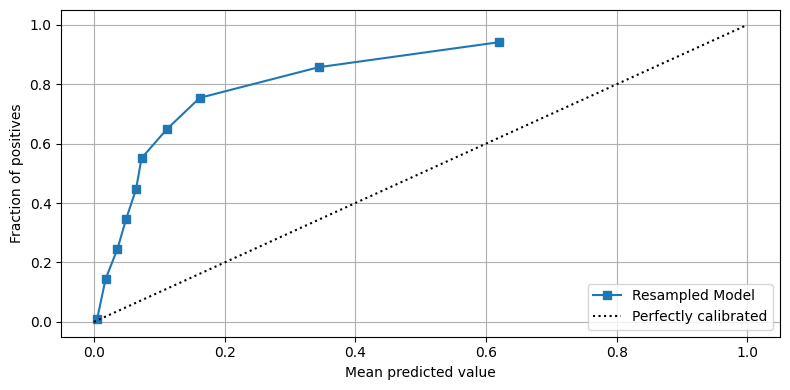

In [40]:
val_predictions = resampled_model.predict(val_features).ravel()
fpr, tpr, thresholds = roc_curve(val_labels, val_predictions)

optimal_idx = np.argmax(tpr - fpr)  # Youden's index
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

mean_predicted_value, fraction_of_positives = calibration_curve(
    val_labels,
    val_predictions,
    n_bins = 10,
    strategy='uniform')

print(f"Calibration bins: {len(mean_predicted_value)}")
print(f"Mean predicted values: {mean_predicted_value}")
print(f"Fraction of positives: {fraction_of_positives}")

plt.figure(figsize = (8, 4))
plt.plot(mean_predicted_value, fraction_of_positives, "s-", label="Resampled Model")
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of positives")
# plt.title("Calibration Curve for Resampled Model")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

## **Code Block 7.25:**
**Two-Stage Model Optimization: Fine-Tuning on Original Data with Probability Calibration and Business-Driven Threshold Selection**

Epoch 1/20
848/848 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - auc: 0.9471 - loss: 0.2938 - prc: 0.6336 - precision: 0.4578 - recall: 0.9465 - val_auc: 0.9302 - val_loss: 0.3631 - val_prc: 0.5937 - val_precision: 0.4222 - val_recall: 0.9026
Epoch 2/20
848/848 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - auc: 0.9465 - loss: 0.3005 - prc: 0.6358 - precision: 0.4568 - recall: 0.9392 - val_auc: 0.9302 - val_loss: 0.3593 - val_prc: 0.5933 - val_precision: 0.4237 - val_recall: 0.9008
Epoch 3/20
848/848 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - auc: 0.9458 - loss: 0.2989 - prc: 0.6317 - precision: 0.4476 - recall: 0.9370 - val_auc: 0.9303 - val_loss: 0.3616 - val_prc: 0.5945 - val_precision: 0.4222 - val_recall: 0.8998
Epoch 4/20
848/848 ━━━━━━━━━━━━━━━━━━━━ 29s 34ms/step - auc: 0.9472 - loss: 0.2944 - prc: 0.6257 - precision: 0.4512 - recall: 0.9455 - val_auc: 0.9303 - val_loss: 0.3679 - val_prc: 0.5940 - val_precision: 0.4196 - val_recall: 0.9055
Epoch 5/20
848/848 ━━━━━━━━━━━━━━━━━━━━ 26s 30ms/step - auc: 0.94

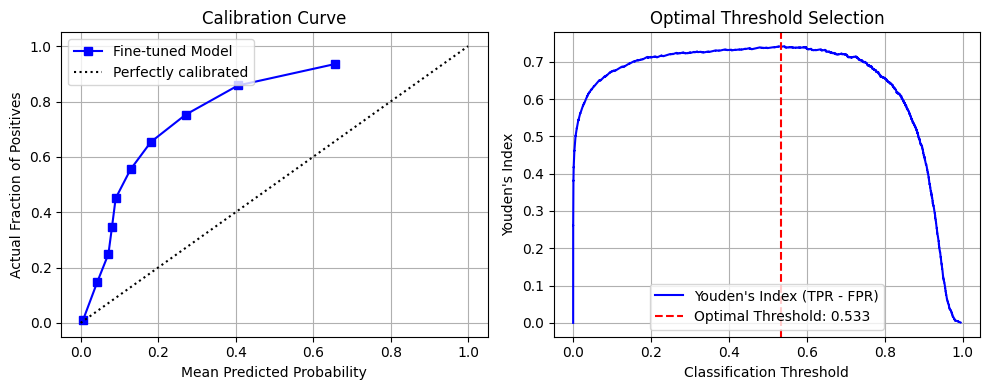

In [43]:
resampled_model.trainable = True

# Fine-tune with lower learning rate and class weights
fine_tune_optimizer = keras.optimizers.Adam(learning_rate=1e-5)
resampled_model.compile(
    optimizer=fine_tune_optimizer,
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[
        keras.metrics.AUC(name="auc"),
        keras.metrics.AUC(name="prc", curve="PR"),
        keras.metrics.Precision(name='precision'),
        keras.metrics.Recall(name='recall')])


# Fine-tune on original data with class weights
fine_tune_history = resampled_model.fit(
    train_features, train_labels,
    class_weight=class_weight,
    validation_data=(val_features, val_labels),
    epochs=20,
    batch_size=best_batch_size,
    verbose=1)

val_predictions = resampled_model.predict(val_features).ravel()

mean_predicted_value, fraction_of_positives = calibration_curve(
    val_labels,
    val_predictions,
    n_bins=10,
    strategy='uniform')

print(f"Number of bins: {len(mean_predicted_value)}")
print(f"Mean predicted values: {mean_predicted_value}")
print(f"Actual positive fractions: {fraction_of_positives}")

fpr, tpr, thresholds = roc_curve(val_labels, val_predictions)
youden_index = tpr - fpr
optimal_idx = np.argmax(youden_index)
optimal_threshold = thresholds[optimal_idx]

print(f"\nOptimal Threshold Selection:")
print(f"Best threshold: {optimal_threshold:.4f}")
print(f"True Positive Rate at this threshold: {tpr[optimal_idx]:.4f}")
print(f"False Positive Rate at this threshold: {fpr[optimal_idx]:.4f}")
print(f"Youden's Index (TPR - FPR): {youden_index[optimal_idx]:.4f}")

plt.figure(figsize=(10, 4))

# Calibration plot
plt.subplot(1, 2, 1)
plt.plot(mean_predicted_value, fraction_of_positives, "s-", label="Fine-tuned Model", color='blue')
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Actual Fraction of Positives")
plt.title("Calibration Curve")
plt.legend(loc="upper left")
plt.grid()

# Threshold analysis plot
plt.subplot(1, 2, 2)
plt.plot(thresholds, youden_index, 'b-', label="Youden's Index (TPR - FPR)")
plt.axvline(x=optimal_threshold, color='r', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.3f}')
plt.xlabel("Classification Threshold")
plt.ylabel("Youden's Index")
plt.title("Optimal Threshold Selection")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

## **Code Block 7.26:**
**Business Performance Metrics and Marketing Efficiency Analysis at Optimized Classification Threshold**

In [44]:
val_predictions_binary = (val_predictions > optimal_threshold).astype(int)
cm = confusion_matrix(val_labels, val_predictions_binary)
tn, fp, fn, tp = cm.ravel()

print(f"\nPerformance at Optimal Threshold ({optimal_threshold:.3f}):")
print(f"True Positives (Subscribers identified): {tp}")
print(f"False Positives (Non-subscribers contacted): {fp}")
print(f"False Negatives (Subscribers missed): {fn}")
print(f"True Negatives (Non-subscribers correctly excluded): {tn}")

recall = tp / (tp + fn) if (tp + fn) > 0 else 0
precision = tp / (tp + fp) if (tp + fp) > 0 else 0

print(f"\nKey Metrics for Marketing:")
print(f"Recall (Subscriber Identification Rate): {recall:.4f}")
print(f"Precision (Contact Efficiency): {precision:.4f}")
print(f"False Positive Rate: {fp/(fp+tn):.4f}")


Performance at Optimal Threshold (0.533):
True Positives (Subscribers identified): 949
False Positives (Non-subscribers contacted): 1246
False Negatives (Subscribers missed): 109
True Negatives (Non-subscribers correctly excluded): 6738

Key Metrics for Marketing:
Recall (Subscriber Identification Rate): 0.8970
Precision (Contact Efficiency): 0.4323
False Positive Rate: 0.1561


## **Code Block 7.27:**
**Strategic Model Retraining with Granular Early Stopping**

In [47]:
def build_simple_strategic_model(train_features, train_labels, val_features, val_labels):

    train_labels_flat = np.ravel(train_labels)
    val_labels_flat = np.ravel(val_labels)

    pos_mask = train_labels_flat == 1
    neg_mask = train_labels_flat == 0

    pos_features = train_features[pos_mask]
    pos_labels = train_labels_flat[pos_mask]
    neg_features = train_features[neg_mask]
    neg_labels = train_labels_flat[neg_mask]

    print(f"Positive samples: {len(pos_features)}, Negative samples: {len(neg_features)}")

    # Oversample minority class
    if len(pos_features) > 0 and len(neg_features) > 0:
        pos_indices = np.arange(len(pos_features))
        oversampled_pos_indices = np.random.choice(pos_indices, size=len(neg_features), replace=True)

        resampled_pos_features = pos_features[oversampled_pos_indices]
        resampled_pos_labels = pos_labels[oversampled_pos_indices]

        # Combine and shuffle
        resampled_features = np.concatenate([resampled_pos_features, neg_features], axis=0)
        resampled_labels = np.concatenate([resampled_pos_labels, neg_labels], axis=0)

        indices = np.arange(len(resampled_labels))
        np.random.shuffle(indices)
        resampled_features = resampled_features[indices]
        resampled_labels = resampled_labels[indices]

        print(f"Resampled dataset: {len(resampled_features)} samples (50/50 balanced)")
    else:
        print("Insufficient data for resampling, using original data")
        resampled_features = train_features
        resampled_labels = train_labels_flat

    # Build model
    model = keras.Sequential()
    model.add(keras.Input(shape=(train_features.shape[1],)))

    # Simple architecture
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))
    model.add(keras.layers.Dense(32, activation='relu'))
    model.add(keras.layers.Dropout(0.3))
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    # Compile
    optimizer = keras.optimizers.Adam(learning_rate=0.001)

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.BinaryCrossentropy(),
        metrics=[keras.metrics.AUC(name="prc", curve="PR")])

    # Strategic Early Stopping
    class StrategicEarlyStopping(keras.callbacks.Callback):
        def __init__(self, patience=8, min_delta=0.001):
            super().__init__()
            self.patience = patience
            self.min_delta = min_delta
            self.best_weights = None
            self.wait = 0
            self.best_prc = 0

        def on_epoch_end(self, epoch, logs=None):
            current_prc = logs.get('val_prc', 0)

            if current_prc > self.best_prc + self.min_delta:
                self.best_prc = current_prc
                self.wait = 0
                self.best_weights = self.model.get_weights()
                print(f"Epoch {epoch+1}: Improved to {current_prc:.4f}")
            else:
                self.wait += 1
                print(f"Epoch {epoch+1}: No improvement ({current_prc:.4f}) - Wait {self.wait}/{self.patience}")

            if self.wait >= self.patience:
                print(f"Early stopping at epoch {epoch+1}")
                self.model.stop_training = True
                if self.best_weights is not None:
                    self.model.set_weights(self.best_weights)

    # Train with strategic stopping
    print("Training with strategic early stopping...")
    history = model.fit(
        resampled_features, resampled_labels,
        validation_data=(val_features, val_labels_flat),
        epochs=50,
        batch_size=128,
        callbacks=[StrategicEarlyStopping(patience=8)],
        verbose=0)

    print(f"Training completed in {len(history.history['loss'])} epochs")
    print(f"Best validation PRC: {max(history.history['val_prc']):.4f}")

    return model, history, val_labels_flat

# Execute simplified strategic training
strategic_model, strategic_history, val_labels_flat = build_simple_strategic_model(
    train_features, train_labels, val_features, val_labels)

# Quick evaluation
val_predictions = strategic_model.predict(val_features).ravel()

fpr, tpr, thresholds = roc_curve(val_labels_flat, val_predictions)
optimal_threshold = thresholds[np.argmax(tpr - fpr)]

val_pred_binary = (val_predictions > optimal_threshold).astype(int)
cm = confusion_matrix(val_labels_flat, val_pred_binary)
tn, fp, fn, tp = cm.ravel()

print(f"\nFinal Performance:")
print(f"True Positives: {tp} | False Negatives: {fn}")
print(f"Recall: {tp/(tp+fn):.4f} | Precision: {tp/(tp+fp):.4f}")
print(f"Optimal threshold: {optimal_threshold:.4f}")

STRATEGIC TRAINING WITH GRANULAR EARLY STOPPING
Positive samples: 3173, Negative samples: 23953
Resampled dataset: 47906 samples (50/50 balanced)
Training with strategic early stopping...
Epoch 1: Improved to 0.4199
Epoch 2: Improved to 0.4418
Epoch 3: Improved to 0.4583
Epoch 4: Improved to 0.4669
Epoch 5: No improvement (0.4673) - Wait 1/8
Epoch 6: Improved to 0.4892
Epoch 7: Improved to 0.4917
Epoch 8: Improved to 0.5161
Epoch 9: Improved to 0.5605
Epoch 10: Improved to 0.5676
Epoch 11: Improved to 0.5862
Epoch 12: No improvement (0.5715) - Wait 1/8
Epoch 13: No improvement (0.5788) - Wait 2/8
Epoch 14: No improvement (0.5836) - Wait 3/8
Epoch 15: Improved to 0.5965
Epoch 16: Improved to 0.6034
Epoch 17: No improvement (0.6005) - Wait 1/8
Epoch 18: No improvement (0.5984) - Wait 2/8
Epoch 19: No improvement (0.5989) - Wait 3/8
Epoch 20: No improvement (0.5973) - Wait 4/8
Epoch 21: No improvement (0.5918) - Wait 5/8
Epoch 22: No improvement (0.5950) - Wait 6/8
Epoch 23: Improved to 0

## **Code Block 7.28:**
**Model Performance Benchmarking**


In [54]:
models = {
    'Baseline': final_model,
    'Weighted': weighted_model,
    'Resampled': resampled_model,
    'Strategic': strategic_model}

comparison_results = {}

print(f"\n{'Model':<12} {'ROC-AUC':<10} {'PRC-AUC':<10} {'Recall':<10} {'Precision':<10} {'F1-Score':<10}")
print("-" * 75)

for name, model in models.items():
    test_predictions = model.predict(test_features).ravel()
    test_binary = (test_predictions > 0.5759).astype(int)  # Same threshold for ALL models

    # Calculate metrics
    roc_auc = roc_auc_score(test_labels, test_predictions)
    prc_auc = average_precision_score(test_labels, test_predictions)

    cm = confusion_matrix(test_labels, test_binary)
    tn, fp, fn, tp = cm.ravel()

    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    comparison_results[name] = {
        'roc_auc': roc_auc,
        'prc_auc': prc_auc,
        'recall': recall,
        'precision': precision,
        'f1_score': f1,
        'tp': tp, 'fp': fp, 'fn': fn, 'tn': tn}

    print(f"{name:<12} {roc_auc:<10.4f} {prc_auc:<10.4f} {recall:<10.4f} {precision:<10.4f} {f1:<10.4f}")

baseline_roc = comparison_results['Baseline']['roc_auc']
baseline_prc = comparison_results['Baseline']['prc_auc']
baseline_recall = comparison_results['Baseline']['recall']

print(f"\n{'Model':<12} {'ROC-AUC':<12} {'PRC-AUC':<12} {'Recall':<12} {'Key Strength':<20}")
print("-" * 75)

for name in ['Weighted', 'Resampled', 'Strategic']:
    roc_improvement = comparison_results[name]['roc_auc'] - baseline_roc
    prc_improvement = comparison_results[name]['prc_auc'] - baseline_prc
    recall_improvement = comparison_results[name]['recall'] - baseline_recall

    # Identify key strength
    if comparison_results[name]['recall'] > 0.85:
        strength = "High Recall"
    elif comparison_results[name]['precision'] > 0.5:
        strength = "High Precision"
    elif comparison_results[name]['f1_score'] == max([comparison_results[m]['f1_score'] for m in models]):
        strength = "Best Balance (F1)"
    else:
        strength = "Balanced"

    print(f"{name:<12} {roc_improvement:>+8.4f}    {prc_improvement:>+8.4f}    {recall_improvement:>+8.4f}    {strength:<20}")

print("\n" + "=" * 80)
print("BUSINESS IMPACT ANALYSIS")
print("=" * 80)

print(f"\n{'Metric':<15} {'Baseline':<12} {'Strategic':<12} {'Improvement':<15} {'Business Impact':<20}")
print("-" * 75)

strategic_results = comparison_results['Strategic']
baseline_results = comparison_results['Baseline']

metrics = [
    ('Subscribers Found', strategic_results['tp'], baseline_results['tp'],
     f"+{strategic_results['tp'] - baseline_results['tp']} subscribers", "Revenue Increase"),

    ('Subscribers Missed', strategic_results['fn'], baseline_results['fn'],
     f"-{baseline_results['fn'] - strategic_results['fn']} missed", "Opportunity Captured"),

    ('False Contacts', strategic_results['fp'], baseline_results['fp'],
     f"{strategic_results['fp'] - baseline_results['fp']:+.0f} contacts", "Marketing Efficiency"),

    ('Recall', strategic_results['recall'], baseline_results['recall'],
     f"{(strategic_results['recall'] - baseline_results['recall'])*100:+.1f}%", "Campaign Coverage")]

for metric_name, strategic_val, baseline_val, improvement, impact in metrics:
    print(f"{metric_name:<15} {baseline_val:<12} {strategic_val:<12} {improvement:<15} {impact:<20}")


Model        ROC-AUC    PRC-AUC    Recall     Precision  F1-Score  
---------------------------------------------------------------------------
283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Baseline     0.9198     0.5896     0.2987     0.6840     0.4158    
283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Weighted     0.9117     0.5609     0.8270     0.4201     0.5571    
283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Resampled    0.9231     0.5952     0.8374     0.4356     0.5731    
283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Strategic    0.9233     0.5922     0.8648     0.4278     0.5724    

Model        ROC-AUC      PRC-AUC      Recall       Key Strength        
---------------------------------------------------------------------------
Weighted      -0.0081     -0.0287     +0.5284    Balanced            
Resampled     +0.0033     +0.0055     +0.5388    Best Balance (F1)   
Strategic     +0.0035     +0.0025     +0.5662    High Recall         

BUSINESS IMPACT ANALYSIS

Metric          Baseline     Str